In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import os 
import pandas as pd
import seaborn as sbn
import math
       
    
    
print(os.listdir(), "\n")
directory=os.listdir()[0]
infile_location =os.path.abspath(directory) 
print("infile location \n",infile_location)
infile=open('facebook_combined.txt','r')
G = nx.read_edgelist(infile)


['2.png', 'facebook_combined.txt', '1.png', '8.png', '6.png', '3.png', 'knn.ipynb', '10.png', 'lastfm_asia.zip', 'code_projet_social_networks.ipynb', 'lastfm_asia', 'karate.txt', 'Untitled.ipynb', '7.png', 'rapport.odt', 'facebook_combined.txt.gz', '4.png', '.ipynb_checkpoints', '9.png', '5.png', 'facebook.tar.gz'] 

infile location 
 /home/amine/2020_2021_Data_Science/projet_social_networks/2.png


In [42]:
# (1) Show the number of nodes and edges in the graph

num_nodes=len(G.nodes())
num_edges=len(G.edges())

print("number of nodes: %d"%num_nodes)
print("number of edges: %d"%num_edges)


number of nodes: 4039
number of edges: 88234


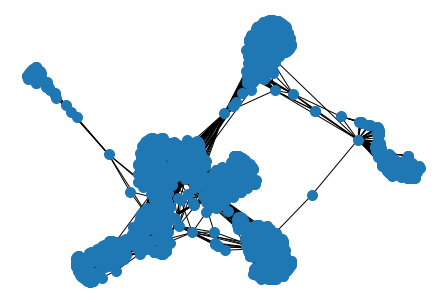

In [4]:
# (2) Draw the graph if small enough; (for large graphs this may be unfeasible.)

nx.draw(G, with_labels=False, node_size =100)
plt.show()

nodes degree:
 [('0', 347), ('1', 17), ('2', 10), ('3', 17), ('4', 10), ('5', 13), ('6', 6), ('7', 20), ('8', 8), ('9', 57), ('10', 10), ('11', 1), ('12', 1), ('13', 31), ('14', 15), ('15', 1), ('16', 9), ('17', 13), ('18', 1), ('19', 16), ('20', 15), ('21', 65), ('22', 11), ('23', 17), ('24', 16), ('25', 69), ('26', 68), ('27', 5), ('28', 13), ('29', 13), ('30', 17), ('31', 23), ('32', 6), ('33', 2), ('34', 5), ('35', 2), ('36', 11), ('37', 1), ('38', 9), ('39', 15), ('40', 44), ('41', 24), ('42', 2), ('43', 1), ('44', 6), ('45', 12), ('46', 5), ('47', 2), ('48', 22), ('49', 4), ('50', 11), ('51', 7), ('52', 2), ('53', 31), ('54', 8), ('55', 17), ('56', 78), ('57', 15), ('58', 12), ('59', 19), ('60', 8), ('61', 3), ('62', 26), ('63', 6), ('64', 7), ('65', 12), ('66', 15), ('67', 76), ('68', 9), ('69', 10), ('70', 2), ('71', 3), ('72', 24), ('73', 10), ('74', 1), ('75', 14), ('76', 3), ('77', 6), ('78', 9), ('79', 12), ('80', 23), ('81', 3), ('82', 34), ('83', 7), ('84', 13), ('85', 14

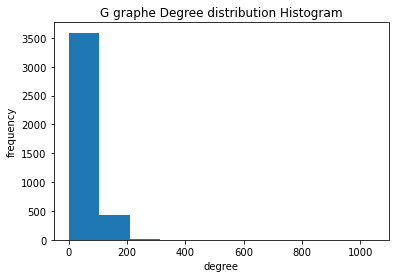

In [43]:
# (3) Draw the histogram of degrees. Compare the distribution with the distribution for a random graph having
# the same average degree. Discuss the results.

# Draw the histogram of degrees of graphe G:

nodes_degree=nx.degree(G)
print("nodes degree:\n",nodes_degree,"\n")
print("sorted nodes degree:\n",sorted(nodes_degree),"\n")

nodes_degree=sorted(nodes_degree)

print("plot:")
deg_dist = [G.degree(x) for x in nx.nodes(G)]
plt.hist(deg_dist)
plt.title('G graphe Degree distribution Histogram')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()


Degree distribution of graphe G


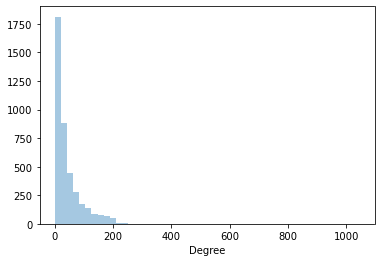

In [44]:
# (3)_

print("Degree distribution of graphe G")
degrees=pd.DataFrame(G.degree(), columns=['Node', 'Degree'])
sbn.distplot(a=degrees['Degree'], kde=False)

In [45]:
degrees=dict(G.degree())


average degree =  43.69101262688784
p =  0.010819963503439287
k_avg_rand_Grh=43.644466


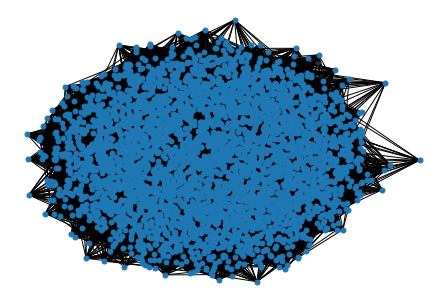

In [59]:
# (3)_

# Creating Random Graphe using k_avr of our facebook social network :

k_avr=2*num_edges/num_nodes
print("average degree = ", k_avr)

p = k_avr/(num_nodes-1)
print("p = ", p)

rand_graphe = nx.generators.random_graphs.gnp_random_graph(num_nodes,p)
nx.draw(rand_graphe, node_size=25)
#plt.show()

rand_graphe_num_edges = len(rand_graphe.edges())
k_avg_rand_graphe = 2*rand_graphe_num_edges/num_nodes

print ("k_avg_rand_Grh=%f"%k_avg_rand_graphe)

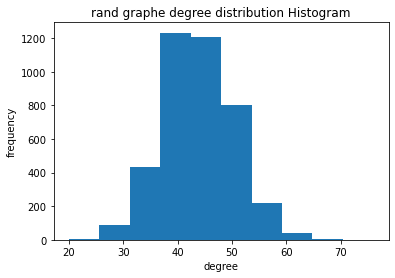

In [60]:
# (3)_

# Draw the histogram of degree distribution for the random graph having the same average degree

deg1_dist = [rand_graphe.degree(x) for x in nx.nodes(rand_graphe)]
plt.hist(deg1_dist)
plt.title('rand graphe degree distribution Histogram')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()

In [61]:
# (4) Draw the histogram of clustering coefficient, and the average clustering coefficient. Compare it with the one
# of a random graph and discuss the results.

G_clust_coeff=nx.clustering(G)
#print(G_clust_coeff)

rand_graphe_clust_coeff=nx.clustering(rand_graphe)
#print(rand_graphe_clust_coeff)


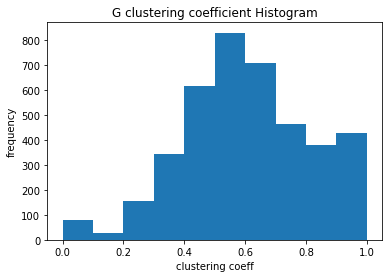

In [62]:
# (4)_ 

# Draw the histogram of clustering coefficient

G_clust_coeff_dist = [G_clust_coeff[x] for x in nx.nodes(G)]
plt.hist(G_clust_coeff_dist)
plt.title('G clustering coefficient Histogram')
plt.xlabel('clustering coeff')
plt.ylabel('frequency')
plt.show()

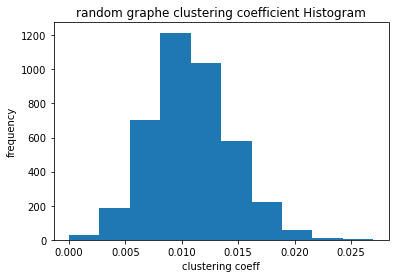

In [63]:
# (4)_

rand_graphe_clust_coeff_dist = [rand_graphe_clust_coeff[x] for x in nx.nodes(rand_graphe)]
plt.hist(rand_graphe_clust_coeff_dist)
plt.title('random graphe clustering coefficient Histogram')
plt.xlabel('clustering coeff')
plt.ylabel('frequency')
plt.show()

In [64]:
print("average_clustering for graphe G = ",nx.average_clustering(G))
print("average_clustering for randome graphe = ",nx.average_clustering(rand_graphe))

average_clustering for graphe G =  0.6055467186200876
average_clustering for randome graphe =  0.010730875052856564


In [57]:
# (5) Draw the histogram of distances in the graphs, the diameter and the average distance. Compare with random 
# graphs and discuss the results.

# Draw the histogram of distances in the graphs

G_diameter=nx.diameter(G)
rand_graphe_diameter=nx.diameter(rand_graphe)

In [58]:
G_avg_distance= math.log(num_nodes) / math.log(k_avr)
rand_graphe_avg_distance = math.log(num_nodes) / math.log(k_avg_rand_graphe)

print("diameter of G is equal to : ", G_diameter)
print("diameter of rand_graphe is equal to : ", rand_graphe_diameter)
print("average distance of graphe G is : ", G_avg_distance)
print("average distance of rand_graphe is : ", rand_graphe_avg_distance)

diameter of G is equal to :  8
diameter of rand_graphe is equal to :  4
average distance of graphe G is :  2.198421846915431
average distance of rand_graphe is :  2.1972757888525076


In [16]:
path = nx.all_pairs_shortest_path_length(G)
rand_path=nx.all_pairs_shortest_path_length(rand_graphe)

G_distances_dist = []
rand_graphe_distances_dist = []

for i in path:
    #print(i,"\n")
    for j in i[1]:
        #print(i[1][j])
        G_distances_dist.append(i[1][j])

for i in rand_path:
    #print(i,"\n")
    for j in i[1]:
        #print(i[1][j])
        rand_graphe_distances_dist.append(i[1][j])

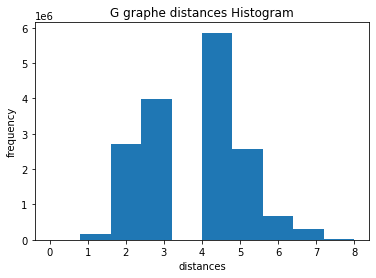

In [17]:
plt.hist(G_distances_dist)
plt.title('G graphe distances Histogram')
plt.xlabel('distances')
plt.ylabel('frequency')
plt.show()

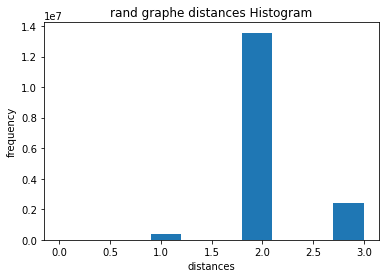

In [18]:
plt.hist(rand_graphe_distances_dist)
plt.title('rand graphe distances Histogram')
plt.xlabel('distances')
plt.ylabel('frequency')
plt.show()

In [73]:
# (6) Analyze the degree correlations of the graph.


#nodes_degree=nx.degree(rand_graphe)
#print(nodes_degree,"\n")
#print(sorted(nodes_degree),"\n")
#nodes_degree=sorted(nodes_degree)

def avg(vect):
    tot=0
    for i in vect:
        tot=tot+i
    cal_avg=tot/len(vect)
    return cal_avg

def knn_funct(GRAPHE):
    nodes_degree=nx.degree(GRAPHE)
    nodes_degree=sorted(nodes_degree)

    deg=[]
    for i in nodes_degree:
        deg.append(i[1])
    deg=sorted(deg)

    matrix={}

    for i in deg:
        matrix[i]=[]
        for j in nodes_degree:
            if j[1]==i:
                matrix[i].append(j[0])
    #print("matrix : contains lists of nodes having same degree \n",matrix,"\n")
    #print("nodes degree\n",sorted(GRAPHE.degree()))

    knn={}
    for i in matrix:
        degree_sum=[]
        collector=[]
        for j in matrix[i]:
            neighboors_j=[n for n in GRAPHE.neighbors(j)]
            for k in neighboors_j:
                collector.append(k)       
        for x in collector:
            for k in nodes_degree: 
                if k[0]==x:
                    degree_sum.append(k[1])
        knn[i]=avg(degree_sum)
    
    return knn

knn=knn_funct(rand_graphe)

knn_x=[]
knnk=[]
for i in knn: 
    knn_x.append(i) 
    knnk.append(knn[i])

print(knn)
print(knn_x)
                


{20: 44.9, 21: 44.857142857142854, 24: 42.666666666666664, 25: 43.94, 26: 44.46153846153846, 27: 44.2962962962963, 28: 44.66883116883117, 29: 44.25078369905956, 30: 44.9, 31: 44.44254032258065, 32: 44.49627976190476, 33: 44.92121212121212, 34: 44.455882352941174, 35: 44.76082474226804, 36: 44.668930041152265, 37: 44.557432432432435, 38: 44.48820915926179, 39: 44.608809993425375, 40: 44.59029126213592, 41: 44.613721990878446, 42: 44.5805291005291, 43: 44.71909843899331, 44: 44.58219696969697, 45: 44.557243319268636, 46: 44.59543770715539, 47: 44.60316674913409, 48: 44.5642797319933, 49: 44.6138147566719, 50: 44.744029850746266, 51: 44.511601307189544, 52: 44.70210113960114, 53: 44.45710951176814, 54: 44.480585424133814, 55: 44.68496503496503, 56: 44.56611969111969, 57: 44.81376518218624, 58: 44.99671592775041, 59: 44.6963890935888, 60: 44.80972222222222, 61: 44.276346604215455, 62: 44.623655913978496, 63: 44.63492063492063, 64: 45.0, 66: 44.984848484848484, 67: 44.81094527363184, 68: 45

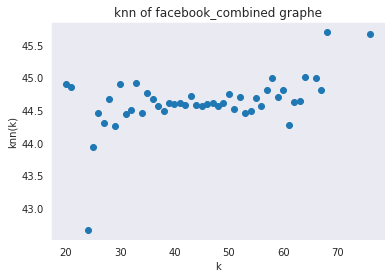

Text(0, 0.5, 'knn(k)')

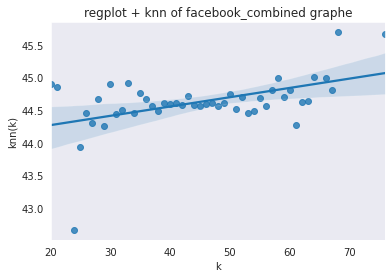

In [74]:
plt.plot(knn_x,knnk,'o')
plt.title('knn of facebook_combined graphe')
plt.xlabel('k')
plt.ylabel('knn(k)')

plt.show()
    
sbn.set_style('dark')
sbn.regplot(knn_x,knnk)
plt.title('regplot + knn of facebook_combined graphe')
plt.xlabel('k')
plt.ylabel('knn(k)')


In [ ]:
#Partie 2

import networkx.algorithms.community as nx_comm

infile=open('facebook_combined.txt','r')
G = nx.read_edgelist(infile)

infile=open('facebook_combined.txt','r')
G_ = nx.read_edgelist(infile)

infile=open('facebook_combined.txt','r')
G__ = nx.read_edgelist(infile)

# (1) Detect the communities in the graph, and discuss the results.

N = len(G.nodes())
L = len(G.edges())

C = []
M = 0

#for i in range(L-1):

i=0
while True:  # Part of this code is token from Lab code we did with our teacher during the lab 
    
    i+=1
    if i>(L-1):
        print("\n END OF LOOP WHILE.")
        break
    # -> 1.compute the betwenness of each edge
    btwns = nx.edge_betweenness_centrality(G_)
    #print(btwns)
    
    # -> 2. find the edge having the max values of betweenness
    maximum = 0
    edge_max = ('0','0')
    for e in btwns.keys():
        if btwns[e]>maximum:
            max = btwns[e]
            edge_max = e
    
    # -> 3. remove the edge and compute the connected components
    G_.remove_edge(edge_max[0],edge_max[1])
    conn_comp=list(nx.connected_components(G_))    
    # -> 4. communities are the connected components
    Modularity = nx_comm.modularity(G,conn_comp)
    if Modularity >= M:
        M = Modularity
        valid_connected_comp = list(nx.connected_components(G_))
        G__.remove_edge(edge_max[0],edge_max[1])

    

print("\n")
print("i=",i)
print("L=",L,"\n")
print("number of communities=",len(valid_connected_comp))
print("List of Connected_components: \n \n",valid_connected_comp)


print("\ngraphe G")
nx.draw(G, node_size=25)
print("number of edges of graphe G)",len(G.edges))
plt.show()

print("\ngraphe G__")
nx.draw(G__, node_size=25)
print("number of edges of graphe G__",len(G__.edges))
plt.show()



 


In [83]:
# (2) Count the number the triangles in the graph, and compare to a random graph.

from scipy.special import comb

Triang = nx.triangles(rand_graphe)
#Triang = nx.triangles(G)

num_Tri_G  = sum(list(Triang.values()))/3

print(nT_G)

45.0


In [88]:
# (3) Compute and discuss other centrality measures: betweenness, PageRank, etc.

infile=open('facebook_combined.txt','r')
G = nx.read_edgelist(infile)

# betweenness :
print("betweenness_centrality \n")
bt=nx.edge_betweenness_centrality(G)

for n in bt.keys():
    print(n,":",bt[n])


betweenness_centrality 

('0', '1') : 0.00040049937955461345
('0', '2') : 0.0004923848145417046
('0', '3') : 0.0004287786850298508
('0', '4') : 0.000494007105805077
('0', '5') : 0.0004102707367255275
('0', '6') : 0.0004943238949383351
('0', '7') : 0.00038541192817595303
('0', '8') : 0.0004941910478824526
('0', '9') : 0.00036799034834932996
('0', '10') : 0.00042155934476553373
('0', '11') : 0.0004951720722951225
('0', '12') : 0.0004951720722951225
('0', '13') : 0.00038378055161711246
('0', '14') : 0.0004916192164720352
('0', '15') : 0.0004951720722951225
('0', '16') : 0.00048681365670770943
('0', '17') : 0.0004910670496064318
('0', '18') : 0.0004951720722951225
('0', '19') : 0.0004895878244032402
('0', '20') : 0.0004917922582781589
('0', '21') : 0.0003490742281667195
('0', '22') : 0.0004152807378449189
('0', '23') : 0.0004897151239996462
('0', '24') : 0.0004832051553132059
('0', '25') : 0.0003673549680936626
('0', '26') : 0.00036784255714446886
('0', '27') : 0.00042273172334349564
('0',

('25', '88') : 2.2856992900554084e-06
('25', '94') : 4.379609767291607e-06
('25', '98') : 1.1330634006622282e-06
('25', '103') : 1.0712174324015657e-05
('25', '104') : 1.463223123085123e-06
('25', '105') : 1.8147502836164311e-06
('25', '113') : 1.2851376757582272e-06
('25', '119') : 2.948210500377264e-05
('25', '122') : 1.0060180663175253e-05
('25', '130') : 2.595821739556657e-06
('25', '141') : 1.3705732528756855e-06
('25', '148') : 1.8569049240900127e-06
('25', '158') : 1.8313012273041048e-06
('25', '169') : 1.0189686484414256e-05
('25', '170') : 1.3550053869439807e-06
('25', '176') : 1.9177753210017384e-06
('25', '185') : 1.395318101816789e-06
('25', '186') : 1.2233525179596187e-06
('25', '188') : 1.1945459170713646e-06
('25', '199') : 1.260645340513503e-06
('25', '200') : 9.889603392904832e-07
('25', '203') : 1.2052639475849765e-06
('25', '221') : 2.56336423542715e-06
('25', '224') : 1.3009804768013703e-06
('25', '231') : 1.8524408163208456e-06
('25', '232') : 1.405250216574086e-06

('56', '62') : 1.816851589287724e-05
('56', '63') : 4.1437194933903305e-05
('56', '66') : 1.3933686776049659e-05
('56', '67') : 5.761307968515189e-07
('56', '72') : 2.8212316095836477e-05
('56', '75') : 1.8877585132624837e-05
('56', '82') : 2.2149459124244558e-05
('56', '88') : 2.3445694256272107e-05
('56', '98') : 1.0351040156706083e-05
('56', '103') : 1.5064874512893755e-06
('56', '104') : 1.3285776531656184e-05
('56', '109') : 9.703836874394766e-06
('56', '113') : 1.3117476598292072e-05
('56', '118') : 1.5262318080991356e-05
('56', '119') : 3.7274859957838015e-05
('56', '122') : 8.309296003771728e-07
('56', '128') : 1.182244255625336e-05
('56', '132') : 2.9289561809055214e-05
('56', '134') : 1.831306766622167e-05
('56', '136') : 0.0011472618582704906
('56', '141') : 1.8123263309617002e-05
('56', '142') : 9.62155543419112e-06
('56', '161') : 9.144719543629872e-06
('56', '169') : 9.948507103919013e-07
('56', '170') : 1.055389355204665e-05
('56', '172') : 1.7948241756335872e-05
('56', 

('107', '484') : 0.0012149624369035838
('107', '517') : 0.0016313522453682869
('107', '526') : 0.0006895963857627348
('107', '538') : 0.001383248432894965
('107', '563') : 0.012672869159448064
('107', '566') : 0.0013637224379209362
('107', '580') : 0.0006927316680253886
('107', '596') : 0.001645197808238973
('107', '601') : 0.0006226236869919217
('107', '606') : 0.0005497613436242101
('107', '629') : 0.00043381115656952274
('107', '637') : 0.000860520184416773
('107', '641') : 0.0003969971409901376
('107', '649') : 0.00043071786539565623
('107', '651') : 0.0008126435398803439
('107', '896') : 0.00038802075025413187
('107', '897') : 0.00030986828515483793
('107', '898') : 0.000464223326815253
('107', '899') : 0.0004947019980973849
('107', '900') : 0.00036996838190054085
('107', '901') : 0.0004886828487266877
('107', '902') : 0.00046898756720239847
('107', '903') : 0.0004800114947432012
('107', '904') : 0.00041332112725507304
('107', '905') : 0.00037512734937964517
('107', '906') : 0.000

('107', '1473') : 0.00030534336513997904
('107', '1474') : 0.0004937107546804163
('107', '1475') : 0.00036371678851032473
('107', '1476') : 0.0004346152968408394
('107', '1477') : 0.00037686090767734054
('107', '1478') : 0.0004613213475808587
('107', '1479') : 0.0004457969600282611
('107', '1480') : 0.00030992327518432756
('107', '1481') : 0.00046838205361269023
('107', '1482') : 0.00038652696817180194
('107', '1483') : 0.00030600824196171756
('107', '1484') : 0.00044310219285677104
('107', '1485') : 0.00026053291892917126
('107', '1486') : 0.00037655078600767693
('107', '1487') : 0.00027112563443035123
('107', '1488') : 0.0003756439887702611
('107', '1489') : 0.0004669094984630548
('107', '1490') : 0.000391721552426572
('107', '1491') : 0.00034006487596503814
('107', '1492') : 0.00037788686671101537
('107', '1493') : 0.0004894604831483389
('107', '1494') : 0.0003767977587731988
('107', '1495') : 0.00039458923535024286
('107', '1496') : 0.00036905929706875136
('107', '1497') : 0.000446

('128', '176') : 5.653976255837846e-07
('128', '186') : 6.086483554757675e-07
('128', '199') : 5.831141268040568e-07
('128', '203') : 6.913800316608213e-07
('128', '211') : 5.72827404161908e-07
('128', '213') : 1.2096918671620998e-05
('128', '223') : 3.8115647527535874e-07
('128', '248') : 6.03067517003323e-07
('128', '252') : 7.193655102345883e-07
('128', '265') : 5.07280774353794e-07
('128', '271') : 7.975470286309027e-07
('128', '313') : 6.527863336812993e-07
('128', '315') : 1.1935880044031665e-05
('128', '322') : 1.2222556951080498e-05
('128', '334') : 6.57969928269919e-07
('129', '168') : 2.2686189542991006e-07
('129', '291') : 1.7760629471044302e-06
('129', '339') : 2.8106876593241393e-05
('129', '347') : 2.166428911312654e-07
('130', '191') : 7.970823352942786e-07
('130', '204') : 8.588343184132304e-07
('130', '213') : 2.8296857173157084e-05
('130', '257') : 9.913332543689532e-07
('130', '277') : 2.525351785371204e-06
('130', '300') : 7.900750180609221e-07
('130', '322') : 2.93

('165', '200') : 1.556690051443141e-06
('165', '334') : 7.746947870490725e-07
('165', '342') : 1.1142807820705134e-06
('166', '173') : 6.927455871294654e-05
('166', '198') : 3.0640529451422853e-05
('166', '202') : 5.722642407240973e-07
('167', '243') : 2.902197220815065e-07
('167', '310') : 3.924097650679525e-07
('167', '337') : 1.6759167049777136e-07
('168', '277') : 2.538776458918839e-06
('168', '291') : 1.1772292952038571e-06
('168', '304') : 2.2869875517129712e-05
('168', '339') : 2.1696003894766834e-05
('168', '347') : 2.166428911312654e-07
('169', '185') : 1.168232610313674e-05
('169', '236') : 1.0470406109424455e-05
('169', '239') : 9.723261890236697e-06
('169', '248') : 1.7728017816578352e-05
('169', '252') : 7.635055123209248e-06
('169', '257') : 1.79919284450963e-05
('169', '271') : 8.954531158712489e-06
('169', '277') : 7.066166930456047e-06
('169', '280') : 1.1607971770436527e-05
('169', '291') : 1.1753707454511652e-05
('169', '315') : 9.47097485078218e-07
('169', '318') : 

('243', '312') : 1.1765480282506142e-06
('243', '337') : 2.7386931520367517e-07
('244', '282') : 1.2262805158373514e-07
('245', '259') : 3.065701289593379e-07
('246', '285') : 1.3200752931562023e-06
('246', '304') : 1.449663534001236e-06
('246', '308') : 5.963647047512537e-07
('246', '315') : 1.3520222150193642e-06
('246', '322') : 1.994439739466318e-06
('246', '339') : 7.659931500553783e-07
('246', '340') : 1.4789212747007198e-05
('248', '252') : 1.1514529940069146e-06
('248', '265') : 7.618719093538754e-07
('248', '277') : 1.2182917804204886e-06
('248', '291') : 9.089623627963961e-07
('248', '311') : 8.134327421721098e-07
('248', '323') : 8.970554749492712e-07
('248', '332') : 7.376396317612519e-07
('249', '254') : 3.293439099677458e-07
('249', '266') : 3.074217126508916e-07
('249', '299') : 4.4966052010297803e-07
('249', '302') : 2.756255683233989e-07
('249', '304') : 2.4319304989472515e-05
('249', '315') : 2.3302925476216138e-05
('249', '330') : 3.5136343113506337e-07
('249', '346'

('428', '434') : 0.00012045531975387409
('428', '436') : 0.00014751011743000602
('428', '438') : 0.00010471931049857844
('428', '444') : 0.00016666437212568884
('428', '451') : 0.00011994748503893824
('428', '452') : 0.0002610122627267582
('428', '456') : 0.00013859931869518793
('428', '460') : 0.00017958742286231595
('428', '461') : 0.0001725884326186735
('428', '463') : 0.00027786596454914473
('428', '465') : 0.00015441031427821078
('428', '473') : 0.00020788481152165985
('428', '475') : 0.000249395390415227
('428', '479') : 0.00018839974988280706
('428', '482') : 0.00015580526261612973
('428', '484') : 0.000248767714656009
('428', '492') : 0.00015660080746375185
('428', '497') : 0.00020379701934867967
('428', '500') : 0.0001976107998910837
('428', '506') : 0.00010295545872741045
('428', '507') : 0.000128369555049826
('428', '508') : 0.000180118112654822
('428', '511') : 0.00016326855415724266
('428', '512') : 0.00018945537357736077
('428', '513') : 0.0001096125605330232
('428', '514

('1684', '3158') : 0.0004717155068177046
('1684', '3159') : 0.0004816718430400337
('1684', '3160') : 0.0004582332190542513
('1684', '3161') : 0.0004772958258329524
('1684', '3162') : 0.0003140134752168038
('1684', '3163') : 0.0004749135978248579
('1684', '3164') : 0.0002466422135427585
('1684', '3165') : 0.0002790642821876236
('1684', '3166') : 0.000473411630953774
('1684', '3167') : 0.0004730173016020473
('1684', '3168') : 0.0002487570779080267
('1684', '3169') : 0.0004518589460633243
('1684', '3170') : 0.0004658993806015026
('1684', '3171') : 0.00046924344135009676
('1684', '3172') : 0.00044786391706586076
('1684', '3173') : 0.00022745338801225123
('1684', '3174') : 0.0004682621158469671
('1684', '3175') : 0.0004878205206026775
('1684', '3176') : 0.00047082896936704737
('1684', '3177') : 0.00045288471387390484
('1684', '3178') : 0.000319468286204492
('1684', '3179') : 0.00026283246224182355
('1684', '3180') : 0.0004942523619082445
('1684', '3181') : 0.0004942523619082445
('1684', '31

('1912', '2308') : 0.0003993246669906773
('1912', '2309') : 0.00034063807621219306
('1912', '2310') : 0.00033039052193981625
('1912', '2311') : 0.0004497678639531547
('1912', '2312') : 0.0003381967276326161
('1912', '2313') : 0.0003268753021632593
('1912', '2314') : 0.00044949310770336606
('1912', '2315') : 0.0001278378537954577
('1912', '2316') : 0.00045660149133161694
('1912', '2317') : 0.0004097568922654321
('1912', '2318') : 0.0003329075636020619
('1912', '2319') : 0.0001018496989876818
('1912', '2320') : 0.0004915837419285413
('1912', '2321') : 0.0004910844705756646
('1912', '2322') : 0.00032482445331945715
('1912', '2323') : 0.00036219157921326187
('1912', '2324') : 0.00031896441613985156
('1912', '2325') : 0.00017633876447722055
('1912', '2326') : 0.0004060532242155488
('1912', '2327') : 0.00012106709339128705
('1912', '2328') : 0.00010211172559056724
('1912', '2329') : 0.00035996631767013876
('1912', '2330') : 0.00018217979926864723
('1912', '2331') : 0.0003614874315572019
('19

('366', '431') : 1.6372432313308922e-05
('366', '434') : 2.76880460696584e-05
('366', '436') : 1.6378477998849555e-05
('366', '438') : 1.8591148589862645e-05
('366', '446') : 3.967403656244028e-05
('366', '460') : 3.3868085277253996e-05
('366', '475') : 6.079488584030792e-06
('366', '482') : 2.2887278157348035e-05
('366', '483') : 1.1393242040816347e-05
('366', '484') : 5.510253597741846e-06
('366', '492') : 1.704271274117817e-05
('366', '493') : 2.4686947653334704e-05
('366', '496') : 2.245217277284191e-05
('366', '497') : 2.0364457562789775e-05
('366', '503') : 2.9014785782962997e-05
('366', '513') : 1.7188461577610015e-05
('366', '514') : 1.6788643410612348e-05
('366', '515') : 1.6560468177112896e-05
('366', '517') : 1.13292277161472e-06
('366', '520') : 2.858361723565431e-05
('366', '524') : 1.900298145111764e-05
('366', '526') : 8.60363350760258e-06
('366', '538') : 2.3881147801634717e-06
('366', '539') : 0.00013634839871539268
('366', '542') : 2.3181364896344403e-05
('366', '544'

('484', '567') : 0.001218968815135565
('484', '580') : 4.327106146397912e-06
('484', '606') : 8.864482059466563e-06
('484', '637') : 1.5092073998154703e-05
('484', '651') : 3.973445101746583e-06
('484', '913') : 6.184254249816211e-05
('484', '936') : 1.5791911727070853e-05
('484', '953') : 7.257346890689789e-05
('484', '968') : 4.054717182236601e-05
('484', '1001') : 2.8282062534271975e-05
('484', '1029') : 6.182802120732303e-05
('484', '1080') : 2.2154754348549325e-05
('484', '1095') : 2.3549670714535653e-05
('484', '1114') : 1.9552905681673428e-05
('484', '1122') : 1.7432367188977315e-05
('484', '1155') : 1.750015039818887e-05
('484', '1160') : 7.75450088384299e-05
('484', '1173') : 8.42765646974847e-05
('484', '1179') : 1.251778304012096e-05
('484', '1217') : 3.749345959642503e-05
('484', '1223') : 3.8723569894218976e-05
('484', '1237') : 1.1783158742000302e-05
('484', '1238') : 8.743561695102098e-05
('484', '1300') : 1.5072987828383519e-05
('484', '1313') : 1.1842334752293554e-05
(

('606', '1179') : 2.3604877761652072e-06
('606', '1183') : 2.3650225216483886e-05
('606', '1210') : 4.672361581856417e-06
('606', '1300') : 2.8676184987069107e-06
('606', '1313') : 2.6533669454843433e-06
('606', '1314') : 3.319330304322573e-05
('606', '1318') : 7.5687832793783225e-06
('606', '1320') : 2.3821763175656865e-06
('606', '1334') : 3.1531982100750307e-05
('606', '1349') : 7.40432689718893e-06
('606', '1357') : 7.636404520445084e-06
('606', '1358') : 2.316593807297392e-06
('606', '1371') : 2.9663719570656045e-05
('606', '1374') : 2.5974681965392525e-06
('606', '1436') : 1.8573884345203268e-05
('606', '1444') : 2.1083098290270936e-05
('606', '1487') : 6.653639529697905e-06
('606', '1490') : 1.4151676710233264e-05
('606', '1512') : 3.0314476243548474e-06
('606', '1514') : 7.024708721299105e-06
('606', '1536') : 6.954888884047434e-06
('606', '1548') : 3.6155670890998824e-05
('606', '1565') : 7.880997420181164e-06
('606', '1574') : 2.83846208890158e-06
('606', '1606') : 7.29634072

('906', '1600') : 4.2047663749213604e-07
('906', '1609') : 6.395072349203779e-07
('906', '1620') : 1.2564022093255224e-06
('906', '1622') : 1.319460436995282e-06
('906', '1623') : 6.005960832545357e-07
('906', '1644') : 5.612247742347299e-07
('906', '1652') : 6.501572462403326e-07
('906', '1653') : 5.952507767434139e-07
('906', '1659') : 4.3029161904139944e-07
('906', '1663') : 9.091838479575945e-06
('906', '1688') : 6.932363444143441e-06
('906', '1689') : 5.890484322324358e-07
('906', '1724') : 4.852546860647557e-07
('906', '1730') : 1.1571599310184485e-06
('906', '1737') : 5.194223113448327e-07
('906', '1746') : 9.065639410701364e-07
('906', '1757') : 7.418489620796579e-07
('906', '1768') : 1.1741932202741656e-06
('906', '1771') : 1.0361607162120582e-06
('906', '1795') : 5.443935029420756e-07
('906', '1796') : 6.384746661252036e-07
('906', '1800') : 1.1740151989680502e-06
('906', '1804') : 9.740244749163776e-07
('906', '1811') : 7.329811715543801e-07
('906', '1816') : 6.6364071720273

('924', '1260') : 6.877643828908759e-07
('924', '1275') : 8.206526422805018e-07
('924', '1304') : 9.401801266580552e-07
('924', '1308') : 9.037000438556051e-07
('924', '1310') : 7.217869769401447e-07
('924', '1338') : 6.633443898076672e-06
('924', '1355') : 6.516559405151336e-07
('924', '1366') : 1.0139051839459514e-06
('924', '1412') : 1.5322464395816841e-06
('924', '1469') : 1.4950981784545052e-06
('924', '1472') : 1.3929575371381776e-06
('924', '1482') : 1.0303737708811329e-06
('924', '1496') : 1.21969097580275e-06
('924', '1500') : 6.875653230201736e-07
('924', '1525') : 8.321313794071583e-07
('924', '1536') : 1.1613368956294907e-05
('924', '1549') : 9.720238055814243e-06
('924', '1703') : 8.653333537076544e-07
('924', '1709') : 1.2076626919861674e-06
('924', '1725') : 1.3944596340637592e-06
('924', '1745') : 7.067726240182486e-06
('924', '1781') : 9.544539214324315e-07
('924', '1830') : 2.2568833202003767e-06
('924', '1876') : 1.1710737540464928e-06
('924', '1906') : 9.73862849413

('942', '1148') : 1.6964069414675694e-06
('942', '1166') : 7.59995991643629e-07
('942', '1204') : 1.3493307495492759e-06
('942', '1215') : 9.276199660530369e-07
('942', '1245') : 5.140998575475059e-07
('942', '1261') : 3.575481552458178e-07
('942', '1282') : 3.4330977527179254e-07
('942', '1284') : 1.4223630253200683e-06
('942', '1303') : 4.833616154131435e-07
('942', '1309') : 4.204977921243342e-07
('942', '1316') : 6.678045125491949e-07
('942', '1324') : 5.499735787400987e-07
('942', '1347') : 1.382690687909955e-06
('942', '1373') : 6.742722292391512e-07
('942', '1396') : 2.725803864858592e-07
('942', '1404') : 2.232266240301137e-06
('942', '1406') : 5.014241493682365e-07
('942', '1451') : 8.353483929487139e-07
('942', '1454') : 2.7646532958264896e-07
('942', '1495') : 3.7164954049729526e-07
('942', '1502') : 6.883441885531656e-07
('942', '1503') : 1.0829307057867557e-06
('942', '1508') : 5.050860918994099e-07
('942', '1515') : 5.891724805263276e-07
('942', '1582') : 3.8980877765927e

('954', '1282') : 4.022337761906846e-07
('954', '1303') : 5.048178288042768e-07
('954', '1324') : 6.31137960384491e-07
('954', '1373') : 7.230086791353403e-07
('954', '1382') : 4.710117059592394e-07
('954', '1396') : 4.389302156626499e-07
('954', '1479') : 1.4734589016415996e-06
('954', '1495') : 4.632726842452521e-07
('954', '1502') : 6.883415578782059e-07
('954', '1515') : 6.815763210629178e-07
('954', '1591') : 1.4904002913285216e-06
('954', '1595') : 5.37808910052466e-07
('954', '1649') : 8.634496678132608e-07
('954', '1661') : 5.921923282170959e-07
('954', '1706') : 5.756816725956292e-07
('954', '1729') : 6.060708194747472e-07
('954', '1732') : 5.269900955116025e-07
('954', '1742') : 4.478727545044763e-07
('954', '1751') : 4.7510253199665415e-07
('954', '1781') : 2.9326968541035664e-06
('954', '1783') : 1.898682740408161e-06
('954', '1786') : 5.784410321521776e-07
('954', '1794') : 1.9893271958040975e-06
('954', '1812') : 4.7569654235387597e-07
('954', '1820') : 4.7549796874242287

('970', '1825') : 9.116138741142017e-06
('970', '1847') : 9.437323851804013e-06
('970', '1866') : 8.985392605331068e-06
('971', '984') : 6.391949541710398e-07
('971', '1014') : 1.5171278404681628e-06
('971', '1020') : 8.478504659721244e-07
('971', '1032') : 1.3048222064863291e-06
('971', '1158') : 1.5296968108954053e-06
('971', '1204') : 2.3478785191689717e-06
('971', '1215') : 7.666805923290385e-07
('971', '1241') : 7.59033634875987e-07
('971', '1247') : 1.149067311928891e-06
('971', '1273') : 9.698585624312366e-07
('971', '1282') : 9.355630548748207e-07
('971', '1347') : 1.4538922691624874e-06
('971', '1429') : 1.2113751187847048e-06
('971', '1489') : 3.063268693762949e-07
('971', '1495') : 9.28471424130641e-07
('971', '1502') : 5.419391746902992e-07
('971', '1503') : 2.850614788082832e-07
('971', '1591') : 1.9863866276579286e-06
('971', '1649') : 2.509725055669831e-07
('971', '1704') : 4.496748498173264e-07
('971', '1706') : 5.984430416708862e-07
('971', '1729') : 1.0179129043182945

('988', '1899') : 8.900921139590874e-07
('989', '1009') : 4.4637148552855293e-07
('989', '1014') : 1.650056125702377e-06
('989', '1019') : 6.657459114968543e-07
('989', '1044') : 4.1845840180330934e-07
('989', '1067') : 6.130655726502235e-07
('989', '1082') : 4.1992658227213487e-07
('989', '1104') : 1.3451644550215057e-06
('989', '1158') : 9.151456519872796e-07
('989', '1227') : 6.985443709953292e-07
('989', '1231') : 6.130633705016332e-07
('989', '1235') : 1.1412217114546183e-06
('989', '1277') : 1.3792125504124534e-06
('989', '1322') : 9.048540993956591e-07
('989', '1345') : 7.958399396809894e-07
('989', '1413') : 4.477401150188905e-07
('989', '1432') : 3.669155840567191e-07
('989', '1462') : 5.532399932711824e-07
('989', '1573') : 8.543123234887183e-07
('989', '1583') : 6.675457581608173e-07
('989', '1628') : 7.294066253865844e-07
('989', '1647') : 4.874158236716744e-07
('989', '1655') : 4.531486676933206e-07
('989', '1661') : 1.5002637857476752e-06
('989', '1680') : 1.1162112955570

('1004', '1603') : 4.233049568667969e-07
('1004', '1610') : 6.26842331768005e-07
('1004', '1612') : 8.170319083542274e-07
('1004', '1617') : 5.767034460876137e-06
('1004', '1620') : 1.863025831661083e-06
('1004', '1621') : 5.9891285556381465e-06
('1004', '1622') : 8.258786474598133e-07
('1004', '1623') : 3.1898632512512316e-07
('1004', '1632') : 4.2018908523871154e-07
('1004', '1643') : 4.402339113970352e-07
('1004', '1644') : 6.814565888062357e-07
('1004', '1652') : 4.1135925153394504e-07
('1004', '1653') : 3.6864466479137656e-07
('1004', '1659') : 4.439899729797145e-07
('1004', '1662') : 5.107348200936981e-07
('1004', '1663') : 6.115922956413132e-06
('1004', '1683') : 5.961116813808245e-07
('1004', '1688') : 7.512991598214039e-06
('1004', '1689') : 3.630507907406414e-07
('1004', '1707') : 5.428249522016378e-07
('1004', '1714') : 4.778593120987667e-07
('1004', '1717') : 4.663201066497257e-07
('1004', '1721') : 3.386644015307364e-07
('1004', '1730') : 1.0460722567172073e-06
('1004', '1

('1019', '1432') : 4.978465729593113e-07
('1019', '1448') : 6.607561150634438e-07
('1019', '1459') : 6.922746324435172e-07
('1019', '1462') : 4.432772877609583e-07
('1019', '1475') : 1.3436425276737782e-06
('1019', '1479') : 5.609982587986265e-07
('1019', '1578') : 6.382294790703087e-07
('1019', '1583') : 6.336692188912593e-07
('1019', '1587') : 4.592957995823443e-07
('1019', '1591') : 1.2214461937637463e-06
('1019', '1596') : 4.6745903019752814e-07
('1019', '1611') : 8.658198724868879e-07
('1019', '1628') : 6.030407357037935e-07
('1019', '1635') : 6.030985495714798e-07
('1019', '1636') : 5.073939468039025e-07
('1019', '1680') : 7.294666904784202e-07
('1019', '1691') : 4.4656774528788943e-07
('1019', '1715') : 4.810905940224471e-07
('1019', '1742') : 2.122748477826879e-06
('1019', '1828') : 2.4579949252412355e-06
('1019', '1857') : 4.852873537148683e-07
('1019', '1859') : 2.709155783645276e-07
('1019', '1862') : 5.093750840159273e-07
('1019', '1884') : 5.715064121564753e-07
('1019', '1

('1040', '1380') : 4.109566875366242e-07
('1040', '1390') : 1.6863384942173253e-06
('1040', '1391') : 1.1061361820434427e-06
('1040', '1402') : 4.0910209944357243e-07
('1040', '1409') : 8.50817427066219e-07
('1040', '1456') : 5.608593788964276e-07
('1040', '1457') : 3.7629762943823645e-07
('1040', '1519') : 1.9922358867242853e-06
('1040', '1542') : 4.5414299257687043e-07
('1040', '1547') : 5.679792526228924e-07
('1040', '1571') : 7.150029632962115e-07
('1040', '1584') : 2.8411624996285984e-06
('1040', '1589') : 1.506256182121296e-06
('1040', '1598') : 1.0952945847509042e-06
('1040', '1604') : 1.4716484265038761e-06
('1040', '1613') : 1.3184239557265534e-06
('1040', '1619') : 4.327419039613474e-07
('1040', '1622') : 2.27931722842044e-06
('1040', '1662') : 8.18563162325309e-07
('1040', '1665') : 5.540744990963433e-07
('1040', '1668') : 5.827462004092954e-07
('1040', '1707') : 9.34473684907319e-07
('1040', '1712') : 5.233026758558332e-07
('1040', '1736') : 6.703968306883157e-07
('1040', '

('1060', '1373') : 1.5903431849255334e-06
('1060', '1423') : 4.3969825636196674e-07
('1060', '1426') : 5.231380074429906e-07
('1060', '1432') : 5.759071435307794e-07
('1060', '1459') : 6.201482231059283e-07
('1060', '1475') : 8.316098806170032e-07
('1060', '1479') : 4.889926147962696e-07
('1060', '1515') : 1.178459855285593e-06
('1060', '1573') : 5.403819347106395e-07
('1060', '1576') : 6.304828667681482e-07
('1060', '1578') : 5.075708998715389e-07
('1060', '1591') : 1.126764005325235e-06
('1060', '1596') : 5.687477461122636e-07
('1060', '1628') : 5.45521524447316e-07
('1060', '1636') : 5.654599309442261e-07
('1060', '1661') : 1.144963539785544e-06
('1060', '1715') : 5.189741177416383e-07
('1060', '1716') : 4.823983063454213e-07
('1060', '1728') : 7.923886507247813e-07
('1060', '1742') : 1.3472774968487748e-06
('1060', '1859') : 6.071648813000172e-07
('1060', '1893') : 1.1672196435427694e-06
('1060', '1899') : 7.054399520337365e-07
('1060', '1903') : 6.841661293152485e-07
('1061', '113

('1075', '1888') : 2.201189760365993e-06
('1076', '1078') : 5.935590578694334e-07
('1076', '1079') : 3.4088648776854623e-07
('1076', '1083') : 8.074476713931842e-07
('1076', '1086') : 3.968068021192815e-06
('1076', '1092') : 8.633651469813135e-07
('1076', '1124') : 7.666422065532793e-07
('1076', '1126') : 4.4019498170257345e-06
('1076', '1132') : 5.816434426213402e-07
('1076', '1146') : 7.437631616699262e-07
('1076', '1149') : 4.442733044518165e-07
('1076', '1156') : 6.727188698591765e-07
('1076', '1163') : 7.114607031226681e-07
('1076', '1175') : 7.870412556944306e-07
('1076', '1181') : 4.204798491544609e-07
('1076', '1184') : 3.9093443173415935e-07
('1076', '1185') : 4.1610695695442106e-07
('1076', '1198') : 4.3255493515603633e-07
('1076', '1199') : 6.338404407137092e-07
('1076', '1211') : 5.3223637764757e-07
('1076', '1222') : 6.915815824446626e-07
('1076', '1242') : 5.833424299978987e-07
('1076', '1243') : 4.824514417154253e-07
('1076', '1250') : 5.087420689046413e-07
('1076', '125

('1085', '3556') : 0.0007363962736050093
('1085', '3561') : 0.0016918754457538562
('1085', '3577') : 0.0011179109039471398
('1085', '3592') : 0.0011121342522429191
('1085', '3609') : 0.0004929622761339331
('1085', '3633') : 0.001649733127858934
('1085', '3651') : 0.0007983728027474788
('1085', '3674') : 0.001151280413900444
('1085', '3677') : 0.001473619973290721
('1085', '3684') : 0.001919353957481303
('1085', '3692') : 0.0007224898139553884
('1085', '3721') : 0.0008075345103607104
('1085', '3741') : 0.0005293875496443147
('1085', '3750') : 0.0008268327436431667
('1085', '3756') : 0.0021917909196809103
('1085', '3797') : 0.0008456162509755864
('1085', '3830') : 0.006596577176020086
('1085', '3851') : 0.0015385833613718184
('1085', '3872') : 0.0008001523477509766
('1085', '3877') : 0.0019972525264153793
('1085', '3886') : 0.0007839692530904863
('1085', '3943') : 0.0006584930867158897
('1085', '3948') : 0.0014984053227291264
('1085', '3962') : 0.000899212903147923
('1086', '1091') : 6.3

('1104', '1635') : 1.7326538887831787e-06
('1104', '1636') : 8.6490142861554e-07
('1104', '1638') : 1.4468403577605547e-06
('1104', '1647') : 1.0256470285737997e-06
('1104', '1655') : 1.207343172723248e-06
('1104', '1680') : 8.067883805604605e-07
('1104', '1682') : 9.564580944564854e-07
('1104', '1691') : 1.1509058375825795e-06
('1104', '1706') : 1.456466113358803e-06
('1104', '1715') : 1.0018325212010003e-06
('1104', '1716') : 8.039063911748636e-07
('1104', '1720') : 8.865920393384851e-07
('1104', '1728') : 1.799644999562105e-06
('1104', '1729') : 1.5099981470109876e-06
('1104', '1742') : 1.0978195552924578e-06
('1104', '1764') : 1.6818006764348407e-06
('1104', '1786') : 8.476318194945202e-07
('1104', '1794') : 4.334485761481041e-06
('1104', '1812') : 1.2814414398801979e-06
('1104', '1824') : 1.324805283761975e-06
('1104', '1841') : 1.3246911115238444e-06
('1104', '1857') : 9.479715847422567e-07
('1104', '1859') : 1.2840182954363648e-06
('1104', '1862') : 1.366672181872072e-06
('1104'

('1123', '1163') : 7.442816113318827e-07
('1123', '1175') : 1.0683293432863696e-06
('1123', '1185') : 1.0011852921170026e-06
('1123', '1196') : 5.3902771940804384e-06
('1123', '1199') : 1.3238577157348925e-06
('1123', '1211') : 9.67503429306468e-07
('1123', '1256') : 1.0065474912244102e-06
('1123', '1271') : 8.809650804201309e-07
('1123', '1272') : 8.709080789823487e-07
('1123', '1305') : 8.3458439824699e-07
('1123', '1341') : 8.060663905874649e-07
('1123', '1361') : 2.0581023697453042e-05
('1123', '1391') : 1.1603907069772838e-06
('1123', '1398') : 5.364784235585711e-07
('1123', '1440') : 6.38269042451874e-06
('1123', '1449') : 5.070590635505988e-07
('1123', '1456') : 9.16381595603379e-07
('1123', '1458') : 5.1311232509136e-06
('1123', '1460') : 1.6509882697724477e-06
('1123', '1467') : 9.385946689652748e-07
('1123', '1471') : 1.0947161414426502e-06
('1123', '1480') : 1.0492277804764004e-06
('1123', '1485') : 5.346167664883156e-06
('1123', '1488') : 8.327810777070995e-07
('1123', '150

('1130', '1598') : 1.2860385960449722e-06
('1130', '1610') : 8.780081823600021e-07
('1130', '1612') : 1.2865878128889456e-06
('1130', '1614') : 8.617841181552165e-07
('1130', '1619') : 5.911227341743342e-07
('1130', '1639') : 1.0294881302545747e-06
('1130', '1662') : 6.231390054306783e-07
('1130', '1668') : 5.007540358301312e-07
('1130', '1689') : 1.007323302993987e-06
('1130', '1707') : 9.061736396212282e-07
('1130', '1712') : 4.898344447558297e-07
('1130', '1746') : 1.2731959191807353e-06
('1130', '1750') : 1.016448197709136e-06
('1130', '1799') : 8.388515506987413e-07
('1130', '1800') : 1.8845402482819851e-06
('1130', '1804') : 9.844418190318286e-07
('1130', '1805') : 1.4419760169502555e-06
('1130', '1809') : 6.296076014140077e-07
('1130', '1826') : 5.966721236258873e-07
('1130', '1833') : 9.061163111586091e-07
('1130', '1839') : 7.370516955083085e-07
('1130', '1849') : 5.914850334038246e-07
('1130', '1863') : 1.0580647962874068e-05
('1130', '1868') : 7.431631976564217e-07
('1130', 

('1153', '1823') : 4.7383898053788336e-07
('1153', '1826') : 3.5396529287569157e-07
('1153', '1832') : 7.378287751702361e-07
('1153', '1833') : 4.815184435762188e-07
('1153', '1839') : 3.725370086956028e-07
('1153', '1842') : 4.7383688857634583e-07
('1153', '1845') : 8.787611989961113e-07
('1153', '1849') : 3.2850000649028764e-07
('1153', '1868') : 3.082472301917086e-07
('1153', '1879') : 3.447878712880867e-07
('1153', '1886') : 6.276065854675512e-07
('1153', '1888') : 5.797181886268951e-07
('1153', '1898') : 3.3639928887589007e-07
('1153', '1902') : 4.4465557184674743e-07
('1154', '1295') : 4.7007419773765135e-07
('1154', '1349') : 4.977882280743091e-06
('1154', '1356') : 9.51535285979507e-07
('1154', '1531') : 1.1967913891469769e-06
('1154', '1543') : 4.189887457734987e-06
('1154', '1785') : 2.0131438468329848e-06
('1155', '1179') : 3.331857400827414e-06
('1155', '1237') : 3.3518944745086815e-06
('1155', '1320') : 3.414760712422804e-06
('1155', '1349') : 9.675980958971257e-07
('1155'

('1173', '1205') : 8.967132097818968e-06
('1173', '1214') : 6.820237360905173e-06
('1173', '1219') : 9.486209503743415e-06
('1173', '1222') : 5.741218895849062e-06
('1173', '1238') : 7.882115243527776e-06
('1173', '1243') : 9.544742874649657e-06
('1173', '1256') : 7.705213545392615e-06
('1173', '1271') : 1.3947962752243064e-05
('1173', '1280') : 1.0542720301031174e-05
('1173', '1323') : 8.380211310248668e-06
('1173', '1329') : 7.698964587636283e-06
('1173', '1330') : 8.741178491307753e-06
('1173', '1331') : 7.745394940019629e-06
('1173', '1335') : 9.934539925208962e-06
('1173', '1359') : 9.860761690900022e-06
('1173', '1377') : 6.250948673670041e-06
('1173', '1388') : 1.0967181303715381e-05
('1173', '1389') : 1.5517234388197274e-05
('1173', '1390') : 6.815615367410603e-06
('1173', '1391') : 7.463689518102839e-06
('1173', '1409') : 7.207531379145789e-06
('1173', '1431') : 7.380776770320542e-06
('1173', '1447') : 7.624270322166607e-06
('1173', '1460') : 9.47484704027649e-06
('1173', '147

('1185', '1823') : 4.1868300916932284e-07
('1185', '1826') : 5.349029602458045e-07
('1185', '1827') : 5.813988233623004e-07
('1185', '1833') : 3.58671621677052e-07
('1185', '1835') : 4.3086350244103906e-06
('1185', '1849') : 4.5886260478026604e-07
('1185', '1864') : 7.023065575195676e-07
('1185', '1868') : 7.018967932270563e-07
('1185', '1879') : 4.0168985609216094e-07
('1185', '1886') : 4.847222981380851e-07
('1185', '1888') : 4.7505063795696114e-07
('1185', '1891') : 6.921324772766888e-07
('1186', '1216') : 3.118464248116599e-07
('1186', '1232') : 2.858018531850508e-07
('1186', '1333') : 2.7374413735528515e-07
('1186', '1363') : 2.4345309713566777e-07
('1186', '1533') : 5.020658905421444e-07
('1186', '1548') : 6.09459621561667e-07
('1186', '1733') : 3.353501346985426e-07
('1186', '1798') : 2.9744998139313e-07
('1186', '1837') : 5.245476999991625e-07
('1186', '1895') : 3.801677678368838e-07
('1187', '1328') : 5.822094090963048e-07
('1187', '1360') : 8.108416798130511e-07
('1187', '141

('1204', '1454') : 1.1715326695605346e-06
('1204', '1459') : 5.627575469982898e-07
('1204', '1462') : 1.0165886372042011e-06
('1204', '1475') : 6.062325237638357e-07
('1204', '1479') : 6.911453518012776e-07
('1204', '1489') : 2.6435019353718793e-06
('1204', '1495') : 8.248813395778763e-07
('1204', '1502') : 9.65139887471576e-07
('1204', '1503') : 3.3660372782093115e-06
('1204', '1515') : 7.228833887181094e-07
('1204', '1573') : 6.485391599364992e-07
('1204', '1576') : 1.3138141040046662e-06
('1204', '1583') : 8.049951833025609e-07
('1204', '1587') : 1.010698109499515e-06
('1204', '1591') : 9.322635232413622e-07
('1204', '1596') : 9.937094589190374e-07
('1204', '1611') : 7.75581543422025e-07
('1204', '1628') : 8.405782374820165e-07
('1204', '1635') : 2.0501919244869705e-06
('1204', '1636') : 8.371974396155935e-07
('1204', '1647') : 1.1703614340791568e-06
('1204', '1649') : 1.6722726956621958e-06
('1204', '1655') : 1.3481983193678042e-06
('1204', '1661') : 6.607112138490003e-07
('1204', 

('1222', '1497') : 3.414286327820094e-06
('1222', '1509') : 3.531957110080319e-06
('1222', '1513') : 4.5881065991542075e-06
('1222', '1520') : 6.72236810449238e-07
('1222', '1547') : 7.663489934890175e-07
('1222', '1551') : 4.863443893467721e-07
('1222', '1554') : 6.102966595004032e-07
('1222', '1557') : 8.061080988877557e-07
('1222', '1559') : 6.374262024744205e-07
('1222', '1563') : 6.682927708962511e-07
('1222', '1570') : 6.360922273627401e-07
('1222', '1580') : 8.542004621296578e-07
('1222', '1584') : 1.5380821625749222e-06
('1222', '1589') : 6.392393188835028e-07
('1222', '1590') : 4.018720611649278e-06
('1222', '1603') : 6.711615447545736e-07
('1222', '1604') : 8.649097105605454e-07
('1222', '1608') : 6.419800458469825e-07
('1222', '1609') : 6.97867781748098e-07
('1222', '1610') : 6.792908972813963e-07
('1222', '1613') : 6.251694675719507e-07
('1222', '1620') : 1.1993933757958778e-06
('1222', '1621') : 3.3658667473744525e-06
('1222', '1622') : 8.844107793470563e-07
('1222', '1659

('1242', '1653') : 4.2482430563028316e-07
('1242', '1659') : 4.0919758429663153e-07
('1242', '1683') : 7.18969818989805e-07
('1242', '1688') : 7.067470152152005e-06
('1242', '1689') : 4.643662969442994e-07
('1242', '1714') : 7.769372191548618e-07
('1242', '1717') : 5.564565438101767e-07
('1242', '1724') : 4.7256313341933957e-07
('1242', '1730') : 1.1154605130515258e-06
('1242', '1746') : 7.241143442006352e-07
('1242', '1750') : 4.897283023257287e-07
('1242', '1752') : 4.112546984970275e-07
('1242', '1789') : 5.201510692116917e-07
('1242', '1795') : 4.157657259765285e-07
('1242', '1796') : 5.533044842019413e-07
('1242', '1800') : 9.97436683293523e-07
('1242', '1804') : 8.627388438811218e-07
('1242', '1810') : 6.048437309249103e-07
('1242', '1816') : 5.827102007353145e-07
('1242', '1819') : 4.891999567491754e-07
('1242', '1823') : 7.160577405645577e-07
('1242', '1827') : 7.789422113481499e-07
('1242', '1833') : 7.494181086574372e-07
('1242', '1835') : 9.401938596273337e-06
('1242', '1839

('1267', '1376') : 4.781799640067354e-06
('1267', '1377') : 7.848027719217338e-07
('1267', '1390') : 4.872602267133508e-07
('1267', '1391') : 4.996266578548396e-07
('1267', '1399') : 5.124986884297086e-07
('1267', '1402') : 5.909534058144107e-07
('1267', '1431') : 9.979158319134335e-07
('1267', '1447') : 7.238788924870147e-07
('1267', '1467') : 8.019715135003156e-07
('1267', '1483') : 7.403966699359013e-06
('1267', '1491') : 2.972185979922603e-07
('1267', '1509') : 4.835557241377012e-06
('1267', '1516') : 3.092813000181775e-07
('1267', '1520') : 5.205618739838201e-07
('1267', '1522') : 4.517824316958674e-06
('1267', '1530') : 3.1294592513878587e-07
('1267', '1557') : 6.00149855573168e-07
('1267', '1559') : 5.490413731853828e-07
('1267', '1570') : 6.220086196923581e-07
('1267', '1584') : 1.6163947267591872e-06
('1267', '1589') : 4.376839965259473e-07
('1267', '1590') : 5.124803088872394e-06
('1267', '1597') : 3.9894541905493015e-07
('1267', '1603') : 3.3427283750489226e-07
('1267', '160

('1284', '1502') : 1.4567760031328532e-06
('1284', '1550') : 1.0348279189913482e-06
('1284', '1573') : 7.080493030620875e-07
('1284', '1576') : 8.094946133030204e-07
('1284', '1583') : 7.626964636903729e-07
('1284', '1587') : 6.773657225706936e-07
('1284', '1591') : 1.3851769514774092e-06
('1284', '1628') : 7.076160752354847e-07
('1284', '1636') : 6.694100295238173e-07
('1284', '1647') : 6.379602694769913e-07
('1284', '1655') : 7.786338632764182e-07
('1284', '1680') : 6.514123634209752e-07
('1284', '1691') : 7.831608787390292e-07
('1284', '1715') : 6.999101194666701e-07
('1284', '1720') : 6.644364089994416e-07
('1284', '1728') : 1.0924480136513953e-06
('1284', '1742') : 1.1138046063620983e-06
('1284', '1764') : 1.0441442922949829e-06
('1284', '1790') : 1.7576621086609566e-06
('1284', '1820') : 1.3649960332539633e-06
('1284', '1841') : 7.602127280863224e-07
('1284', '1857') : 8.094182670713064e-07
('1284', '1859') : 8.913147622850774e-07
('1284', '1899') : 4.3501029038332007e-07
('1284'

('1305', '1656') : 7.654426107626436e-05
('1305', '1663') : 4.183179032604522e-06
('1305', '1668') : 9.627586924888956e-07
('1305', '1683') : 1.083302408237595e-06
('1305', '1714') : 9.83685960828649e-07
('1305', '1730') : 1.6089851680769228e-06
('1305', '1735') : 7.706122645706426e-07
('1305', '1746') : 1.1905004684716083e-06
('1305', '1757') : 8.614296482127128e-07
('1305', '1761') : 1.6734178293572913e-06
('1305', '1768') : 1.3682802071247199e-06
('1305', '1769') : 4.567123412943128e-06
('1305', '1774') : 1.2627468118650661e-06
('1305', '1782') : 3.8915419527257375e-06
('1305', '1799') : 7.948889436786702e-07
('1305', '1800') : 1.4239476529082676e-06
('1305', '1804') : 1.0348820695326904e-06
('1305', '1805') : 2.378300921787434e-06
('1305', '1813') : 1.7989072797120429e-06
('1305', '1823') : 1.024565183417061e-06
('1305', '1833') : 9.945229648794578e-07
('1305', '1835') : 4.207833891442989e-06
('1305', '1836') : 4.4318940376135205e-06
('1305', '1846') : 4.563776312247138e-06
('1305'

('1330', '1835') : 6.25906466213965e-06
('1330', '1839') : 5.121203080132921e-07
('1330', '1842') : 4.53857056626841e-07
('1330', '1861') : 9.840754953193062e-07
('1330', '1868') : 4.391085594646192e-07
('1330', '1879') : 5.08722054895563e-07
('1330', '1888') : 7.722640128672295e-07
('1330', '1898') : 4.5651161598114255e-07
('1330', '1900') : 1.531122874133721e-06
('1331', '1339') : 7.930659648636152e-07
('1331', '1341') : 5.064535813800691e-07
('1331', '1352') : 4.575131240325286e-06
('1331', '1361') : 1.591410673662664e-05
('1331', '1367') : 6.596092920043054e-07
('1331', '1370') : 4.866216355598608e-07
('1331', '1376') : 4.662401562206149e-06
('1331', '1377') : 7.53947329699489e-07
('1331', '1380') : 5.116635452594095e-07
('1331', '1388') : 4.838379041866651e-07
('1331', '1390') : 5.637031872134346e-07
('1331', '1393') : 1.4893128293279188e-06
('1331', '1399') : 5.386783186303055e-07
('1331', '1402') : 5.846456795792814e-07
('1331', '1409') : 6.240150771750057e-07
('1331', '1420') :

('1345', '1515') : 1.2204277565710534e-06
('1345', '1550') : 7.195111979936217e-07
('1345', '1573') : 5.713672862865248e-07
('1345', '1576') : 3.381569632505709e-07
('1345', '1578') : 8.268943513047847e-07
('1345', '1583') : 3.691263200054417e-07
('1345', '1587') : 5.360875832031196e-07
('1345', '1591') : 9.761869021535666e-07
('1345', '1592') : 1.0502662057642681e-06
('1345', '1595') : 1.6050681490685979e-06
('1345', '1596') : 5.024521615496071e-07
('1345', '1611') : 7.122405192377381e-07
('1345', '1628') : 5.056992256479116e-07
('1345', '1635') : 8.934636335125313e-07
('1345', '1636') : 4.851190366202768e-07
('1345', '1638') : 1.6405785142695593e-06
('1345', '1647') : 6.09097179686662e-07
('1345', '1655') : 5.220639274294645e-07
('1345', '1661') : 1.2768726837781104e-06
('1345', '1680') : 6.996785594966263e-07
('1345', '1691') : 5.420006302885437e-07
('1345', '1715') : 4.928274046233071e-07
('1345', '1716') : 5.702213291057288e-07
('1345', '1720') : 8.293529882189802e-07
('1345', '17

('1366', '1876') : 9.80125373010635e-07
('1367', '1375') : 7.062166837584209e-07
('1367', '1376') : 4.224787659032301e-06
('1367', '1377') : 6.498321767346266e-07
('1367', '1380') : 9.262196799202361e-07
('1367', '1390') : 4.4480175379989076e-07
('1367', '1391') : 6.348853037942725e-07
('1367', '1399') : 6.353306718854779e-07
('1367', '1416') : 4.119956658069006e-07
('1367', '1420') : 4.403958802198296e-05
('1367', '1431') : 1.0180317503415512e-06
('1367', '1449') : 1.1464385170254203e-06
('1367', '1471') : 7.814620481726441e-07
('1367', '1488') : 8.326943580971127e-07
('1367', '1491') : 5.492127612500255e-07
('1367', '1509') : 4.501035273195309e-06
('1367', '1516') : 4.6851854405225884e-07
('1367', '1520') : 7.219208689312693e-07
('1367', '1522') : 4.079868474268052e-06
('1367', '1524') : 1.1725114073261517e-06
('1367', '1530') : 6.327451778905608e-07
('1367', '1539') : 6.664164434945097e-07
('1367', '1547') : 6.498785381681879e-07
('1367', '1551') : 6.766848048810562e-07
('1367', '15

('1388', '1612') : 1.5361694985359858e-06
('1388', '1613') : 8.933486399053728e-07
('1388', '1620') : 1.7910444255355143e-06
('1388', '1622') : 1.3224100484313323e-06
('1388', '1637') : 1.1090749436618332e-06
('1388', '1662') : 6.299283963961723e-07
('1388', '1663') : 7.383307021357056e-06
('1388', '1665') : 4.6825075005213117e-07
('1388', '1707') : 6.993105646673061e-07
('1388', '1714') : 8.706532837009479e-07
('1388', '1722') : 5.244561314358768e-07
('1388', '1730') : 1.4390027096379413e-06
('1388', '1736') : 6.149697294548198e-07
('1388', '1741') : 5.022326039036362e-07
('1388', '1754') : 7.927289951495787e-07
('1388', '1768') : 1.0543367446679792e-06
('1388', '1772') : 4.500464852845824e-07
('1388', '1793') : 5.219462491228596e-07
('1388', '1809') : 5.123664862265422e-07
('1388', '1813') : 1.158834987157911e-06
('1388', '1835') : 7.85626681469638e-06
('1388', '1842') : 4.311256156856019e-07
('1388', '1845') : 8.06383290377716e-07
('1388', '1849') : 4.880010587336342e-07
('1388', '1

('1413', '1691') : 3.440576989313561e-07
('1413', '1715') : 3.424587079924915e-07
('1413', '1716') : 4.5005427104404764e-07
('1413', '1728') : 4.7595638662766634e-07
('1413', '1732') : 1.8306248007067472e-06
('1413', '1783') : 3.890232040583219e-06
('1413', '1790') : 3.1262614595918152e-06
('1413', '1841') : 2.959461454397517e-07
('1413', '1859') : 4.6720314832376377e-07
('1413', '1875') : 9.216011290788464e-07
('1414', '1573') : 2.373012980738215e-06
('1414', '1716') : 1.4021756262347279e-06
('1414', '1862') : 1.0156230415095775e-06
('1414', '1872') : 1.308576438819872e-06
('1415', '1469') : 8.172534913501657e-07
('1415', '1472') : 1.7368922465130653e-06
('1415', '1482') : 8.49298633322676e-07
('1415', '1496') : 7.661007274767635e-07
('1415', '1507') : 3.6796407697752365e-07
('1415', '1541') : 6.244293991532601e-07
('1415', '1624') : 5.909100179174137e-07
('1415', '1630') : 2.3668658105362735e-06
('1415', '1667') : 8.198022567689616e-07
('1415', '1672') : 6.802025662082942e-07
('1415'

('1446', '1692') : 1.0686309150034373e-06
('1446', '1694') : 4.310245958674681e-06
('1446', '1695') : 4.744512316696944e-06
('1446', '1744') : 3.356982849712296e-06
('1446', '1763') : 3.783868305871188e-06
('1446', '1766') : 3.5156231990810566e-06
('1446', '1773') : 5.173726494042982e-06
('1446', '1778') : 8.306177973980366e-07
('1446', '1790') : 5.4136813583388435e-06
('1446', '1882') : 2.8610195227169394e-06
('1447', '1456') : 6.088788639391115e-07
('1447', '1457') : 8.281717853688263e-07
('1447', '1458') : 5.931947459550739e-06
('1447', '1463') : 3.2456589713107332e-06
('1447', '1470') : 7.705401460102271e-07
('1447', '1471') : 7.729173003416304e-07
('1447', '1483') : 5.739450358498529e-06
('1447', '1488') : 5.846124967928972e-07
('1447', '1509') : 4.7467511837715755e-06
('1447', '1517') : 1.0796701721547644e-06
('1447', '1535') : 7.625789705446201e-07
('1447', '1542') : 8.992701637588994e-07
('1447', '1551') : 5.246387236630581e-07
('1447', '1559') : 6.369228189471783e-07
('1447', 

('1471', '1584') : 1.6336916173431717e-06
('1471', '1589') : 5.672556478936995e-07
('1471', '1590') : 4.790321257656185e-06
('1471', '1597') : 7.693875333563642e-07
('1471', '1598') : 9.380447666372321e-07
('1471', '1600') : 9.031385631852706e-07
('1471', '1603') : 5.959060032912458e-07
('1471', '1604') : 1.1975944136545667e-06
('1471', '1605') : 8.479323811865087e-07
('1471', '1610') : 4.5915543716926657e-07
('1471', '1612') : 7.704486822124006e-07
('1471', '1613') : 5.860319132241708e-07
('1471', '1614') : 1.0790629903387075e-06
('1471', '1619') : 6.299431963402993e-07
('1471', '1621') : 4.147896413031425e-06
('1471', '1623') : 7.459771105577619e-07
('1471', '1637') : 1.2625219142088388e-06
('1471', '1643') : 7.390504262339119e-07
('1471', '1652') : 7.99667132606455e-07
('1471', '1659') : 1.0783028431009453e-06
('1471', '1662') : 5.789763493219307e-07
('1471', '1663') : 4.1349484225084075e-06
('1471', '1668') : 4.7435692414990967e-07
('1471', '1675') : 1.0212843320321423e-06
('1471',

('1505', '1528') : 0.00010298658595913137
('1505', '1534') : 3.898521439128588e-05
('1505', '1552') : 4.537000179780321e-05
('1505', '1561') : 3.773606827790049e-05
('1505', '1593') : 0.00022243230827559204
('1505', '1656') : 5.449734557421238e-06
('1505', '1666') : 4.06380604863885e-05
('1505', '1674') : 3.0949557698054524e-05
('1505', '1701') : 4.184375235774597e-05
('1505', '1758') : 7.3107199198457456e-06
('1505', '2678') : 9.46740706061373e-05
('1505', '2725') : 0.00012806939741942565
('1505', '2734') : 0.00017489235382794034
('1505', '2760') : 0.00012558358494421632
('1505', '2764') : 5.690626227177683e-05
('1505', '2826') : 7.902668869652227e-05
('1505', '2883') : 5.824969583565834e-05
('1505', '2964') : 0.00010733199722580888
('1505', '2968') : 8.22686335753907e-05
('1505', '2976') : 0.00014328275924005153
('1505', '3005') : 0.00014400748495718992
('1505', '3011') : 0.00013706272247155445
('1505', '3019') : 0.0001507117413939584
('1505', '3020') : 0.00013067636774085744
('1505'

('1534', '3265') : 0.00033402285214539473
('1534', '3278') : 9.017796611381136e-05
('1534', '3361') : 0.0001751196244016525
('1534', '3385') : 0.00030356765165920455
('1535', '1537') : 4.592685268071282e-05
('1535', '1551') : 8.136613963151421e-07
('1535', '1559') : 1.0642082484200057e-06
('1535', '1570') : 6.132322737228806e-07
('1535', '1571') : 7.008438765342157e-07
('1535', '1604') : 1.2415847575396226e-06
('1535', '1608') : 7.127167011189978e-07
('1535', '1609') : 6.028502082247267e-07
('1535', '1639') : 1.3007130820282946e-06
('1535', '1663') : 6.769237617459975e-06
('1535', '1669') : 6.505252399218399e-07
('1535', '1675') : 7.348013438838689e-07
('1535', '1685') : 6.754534170756739e-07
('1535', '1717') : 1.1431845373589603e-06
('1535', '1730') : 1.657281366940372e-06
('1535', '1768') : 1.2669632909997984e-06
('1535', '1793') : 8.088913921049244e-07
('1535', '1804') : 1.2592144985604002e-06
('1535', '1811') : 4.6455531669974914e-07
('1535', '1813') : 1.3269237814007797e-06
('1535

('1563', '1836') : 4.1088994109121545e-06
('1563', '1839') : 6.892266448066449e-07
('1563', '1845') : 6.61283585327758e-07
('1563', '1852') : 6.783570923617351e-06
('1563', '1861') : 1.009802195445679e-06
('1563', '1891') : 4.877876333365591e-07
('1564', '1585') : 4.905122063349405e-07
('1564', '1666') : 7.921126730938395e-05
('1564', '1675') : 6.187478346634779e-06
('1564', '1779') : 1.1012445997307233e-06
('1564', '1822') : 2.881759212217776e-07
('1564', '1860') : 1.5248173936583825e-06
('1564', '1905') : 4.655588474866118e-07
('1565', '1602') : 1.7104140845393275e-06
('1565', '1606') : 4.590056851707409e-07
('1565', '1625') : 4.90900155149176e-07
('1565', '1645') : 6.319900436844289e-07
('1565', '1660') : 7.521073199949498e-07
('1565', '1671') : 1.2978575695018802e-06
('1565', '1679') : 6.905972404795859e-07
('1565', '1692') : 4.201886161458701e-06
('1565', '1695') : 3.2746918804923334e-07
('1565', '1740') : 3.7406745057140087e-06
('1565', '1744') : 6.771259349744562e-07
('1565', '1

('1589', '1662') : 4.1830990697501827e-07
('1589', '1663') : 3.1917458133033724e-06
('1589', '1665') : 6.177898782625586e-07
('1589', '1668') : 5.971827643665639e-07
('1589', '1669') : 4.1794765085972574e-07
('1589', '1675') : 7.214063354890397e-07
('1589', '1683') : 7.275108396137621e-07
('1589', '1685') : 6.704644055710962e-07
('1589', '1689') : 5.02750174570599e-07
('1589', '1707') : 3.8769174240819335e-07
('1589', '1712') : 7.274339468130723e-07
('1589', '1714') : 3.197207956746898e-07
('1589', '1717') : 4.949400308679066e-07
('1589', '1721') : 5.567661766842249e-07
('1589', '1722') : 1.8965032323685852e-06
('1589', '1730') : 5.775796498415943e-07
('1589', '1734') : 1.1238643957811277e-06
('1589', '1735') : 5.834201049542655e-07
('1589', '1736') : 4.5451041086967474e-07
('1589', '1737') : 8.215310557018579e-07
('1589', '1746') : 4.9317306410564e-07
('1589', '1750') : 5.344910443868809e-07
('1589', '1752') : 5.447641339135622e-07
('1589', '1753') : 7.140153985811297e-07
('1589', '17

('1613', '1623') : 6.007216543839432e-07
('1613', '1632') : 7.083601840133483e-07
('1613', '1637') : 9.13164573264293e-07
('1613', '1639') : 1.0192726003981828e-06
('1613', '1643') : 4.943455512998366e-07
('1613', '1644') : 1.2249778118736518e-06
('1613', '1652') : 8.165593673160298e-07
('1613', '1653') : 8.637806448346387e-07
('1613', '1662') : 4.6318338266700343e-07
('1613', '1663') : 3.5435054908539602e-06
('1613', '1665') : 5.820028234307365e-07
('1613', '1668') : 5.67073842708256e-07
('1613', '1669') : 4.268475198500421e-07
('1613', '1675') : 6.642296695366793e-07
('1613', '1683') : 6.702070904498128e-07
('1613', '1685') : 6.40418676909979e-07
('1613', '1689') : 5.257811176261125e-07
('1613', '1707') : 4.2008720668253664e-07
('1613', '1712') : 6.69541592062181e-07
('1613', '1714') : 3.713217152484962e-07
('1613', '1717') : 4.6430242438347876e-07
('1613', '1721') : 5.354421583848862e-07
('1613', '1730') : 6.480985570784749e-07
('1613', '1734') : 1.0459254747798955e-06
('1613', '173

('1655', '1862') : 3.474559746423558e-07
('1655', '1872') : 5.176654207836098e-07
('1656', '1666') : 2.1616486508075292e-05
('1656', '1687') : 0.0001038992176644842
('1656', '1702') : 6.573881711390487e-05
('1656', '1726') : 2.5056666748140156e-06
('1656', '1806') : 0.00010325830676773256
('1656', '1852') : 6.737062885528824e-05
('1656', '2764') : 6.024159136351328e-05
('1656', '2826') : 8.339158123889737e-05
('1656', '2883') : 6.0261124846273474e-05
('1656', '2964') : 0.0001134097815710766
('1656', '3057') : 9.953152715337178e-05
('1656', '3097') : 0.0001860735880556097
('1656', '3164') : 7.452410233627457e-05
('1656', '3165') : 0.00010954442932159742
('1656', '3263') : 7.061210530450869e-05
('1656', '3278') : 5.38171238274418e-05
('1657', '1776') : 1.2262805158373514e-07
('1657', '1808') : 1.0568072666544334e-05
('1658', '1794') : 2.764769279210418e-06
('1658', '1807') : 1.1808007499668464e-06
('1658', '1818') : 7.524865843639148e-07
('1658', '1823') : 4.385947361355027e-06
('1658', 

('1704', '1894') : 1.306312575945703e-06
('1705', '1719') : 3.313200425270857e-07
('1705', '1803') : 3.886522477364295e-07
('1705', '1825') : 4.977255510736225e-07
('1705', '1866') : 6.17499393581271e-07
('1706', '1729') : 6.427820559428979e-07
('1706', '1742') : 5.528294582718684e-07
('1706', '1783') : 2.2264690193954756e-06
('1706', '1786') : 6.784979328675552e-07
('1706', '1794') : 1.5647576817552598e-06
('1706', '1850') : 4.5553712898889903e-07
('1706', '1871') : 6.140080244894955e-07
('1706', '1893') : 6.763717327778522e-07
('1707', '1712') : 4.991512243480094e-07
('1707', '1714') : 3.531628364201429e-07
('1707', '1717') : 5.322779252674959e-07
('1707', '1721') : 5.739695253715876e-07
('1707', '1722') : 1.4223635078016525e-06
('1707', '1730') : 7.365176731258003e-07
('1707', '1735') : 6.62083917479326e-07
('1707', '1736') : 2.89354045804631e-07
('1707', '1737') : 8.095558839681329e-07
('1707', '1741') : 5.381504843829305e-07
('1707', '1746') : 5.273959177094636e-07
('1707', '1750'

('1750', '1752') : 4.2556381574903137e-07
('1750', '1761') : 1.1420281769228743e-06
('1750', '1771') : 1.5792329926492163e-06
('1750', '1789') : 5.619932679602484e-07
('1750', '1791') : 7.186372667217082e-07
('1750', '1793') : 5.813499901573544e-07
('1750', '1795') : 4.5648135437056994e-07
('1750', '1799') : 4.3172430072184506e-07
('1750', '1800') : 8.045685906258984e-07
('1750', '1819') : 4.58173137651141e-07
('1750', '1823') : 5.389430541860191e-07
('1750', '1827') : 5.73114456820694e-07
('1750', '1833') : 5.166906143889669e-07
('1750', '1835') : 5.585138373686522e-06
('1750', '1844') : 1.1241068963208968e-05
('1750', '1849') : 5.73772487359861e-07
('1750', '1867') : 4.980321531417347e-07
('1750', '1879') : 5.481464793109833e-07
('1750', '1888') : 8.276728748539894e-07
('1750', '1902') : 7.264241443245701e-07
('1751', '1783') : 2.26016604238424e-06
('1751', '1786') : 8.076636021464231e-07
('1751', '1812') : 3.0374614712238536e-07
('1751', '1820') : 3.2304281250280024e-07
('1751', '18

('1879', '1898') : 5.131596272390253e-07
('1879', '1902') : 4.2156024119830195e-07
('1880', '1892') : 3.6749397458707534e-07
('1880', '1895') : 2.44399210902255e-07
('1881', '1882') : 1.7005805108979145e-06
('1881', '1885') : 1.966782642985295e-06
('1881', '1897') : 1.489491786157198e-06
('1881', '1910') : 2.830732175093536e-06
('1884', '1899') : 1.1080067071894011e-06
('1884', '1903') : 3.2665796760510295e-07
('1885', '1897') : 1.5196414526477452e-06
('1886', '1888') : 8.38685912485744e-07
('1887', '1899') : 2.0624903009708824e-06
('1888', '1891') : 1.4990237574243835e-06
('1888', '1898') : 1.015176634728366e-06
('1888', '1902') : 7.119379420573694e-07
('1893', '1894') : 8.973827470999164e-07
('1894', '1907') : 7.456232390803103e-07
('1897', '1910') : 2.8670249746182786e-06
('1898', '1902') : 4.790311410322172e-07
('1899', '1903') : 1.0034606045031063e-06
('1899', '1907') : 1.9120000685656176e-06
('1901', '1910') : 1.2067289733280101e-06
('1902', '1911') : 6.846348495341115e-06
('1904

('1972', '2494') : 5.791285111955869e-07
('1972', '2531') : 6.9189389565282845e-06
('1972', '2538') : 3.863333662803687e-07
('1972', '2583') : 4.3608061485986304e-07
('1972', '2585') : 3.666897933562146e-06
('1972', '2620') : 2.1877936351109507e-06
('1972', '2627') : 2.8975579981782453e-06
('1972', '2629') : 2.1676845277258206e-05
('1972', '2633') : 3.1010034870562e-06
('1972', '2636') : 5.449591063737737e-07
('1972', '2639') : 2.1834840592152313e-06
('1972', '2640') : 3.8849863980758096e-07
('1972', '2645') : 1.8668907157256325e-06
('1972', '2647') : 5.039920798840933e-07
('1972', '2648') : 2.0717668150404287e-06
('1972', '2657') : 2.400648697407949e-06
('1972', '2658') : 3.918291585467549e-06
('1972', '2659') : 4.549241163068065e-06
('1972', '2660') : 4.952493319516244e-07
('1973', '1914') : 2.261532580928465e-06
('1973', '1919') : 2.3743021108230485e-06
('1973', '1921') : 2.7462767289716223e-06
('1973', '1927') : 2.1007463575527944e-06
('1973', '1928') : 2.7664154351724e-06
('1973',

('2027', '2639') : 1.9140068005591005e-06
('2027', '2640') : 2.6142318854935205e-07
('2027', '2645') : 1.667885746834389e-06
('2027', '2657') : 2.1581278588278034e-06
('2032', '1916') : 1.7938785001156298e-06
('2032', '1920') : 1.0082263451907392e-06
('2032', '1923') : 1.0890475419484084e-05
('2032', '1940') : 1.232281394472735e-06
('2032', '1941') : 4.181918714060677e-06
('2032', '1947') : 1.3098689737063572e-06
('2032', '1948') : 1.1373978142913349e-06
('2032', '1954') : 2.2060599522868413e-06
('2032', '1959') : 1.344597580906397e-06
('2032', '2010') : 1.4617008842030481e-06
('2032', '2028') : 1.2037572478055968e-06
('2032', '2038') : 6.404204575656821e-07
('2032', '2039') : 4.1453303130709955e-07
('2032', '2042') : 4.3671132851703007e-07
('2032', '2047') : 3.141509677690859e-06
('2032', '2054') : 3.62112991702267e-07
('2032', '2068') : 3.076189729335623e-07
('2032', '2071') : 3.7243311319430536e-07
('2032', '2072') : 4.1259523381194116e-07
('2032', '2081') : 4.479129919577588e-07
('

('2068', '2282') : 1.1219772785232328e-06
('2068', '2283') : 6.396631476439084e-07
('2068', '2289') : 9.525880065274088e-07
('2068', '2293') : 2.3403768809164253e-06
('2068', '2294') : 1.2122584685298817e-06
('2068', '2302') : 5.899014151025029e-07
('2068', '2305') : 1.9161011488335848e-05
('2068', '2319') : 3.786736179657007e-07
('2068', '2328') : 1.211310475735389e-06
('2068', '2330') : 1.9665725146563874e-06
('2068', '2332') : 1.289205606166987e-06
('2068', '2333') : 1.1752645758465621e-06
('2068', '2338') : 1.1596948953593682e-06
('2068', '2343') : 1.5005501166894894e-06
('2068', '2344') : 1.488218368565046e-06
('2068', '2345') : 9.633896441293237e-06
('2068', '2347') : 7.416570234525217e-06
('2068', '2366') : 1.9035188276550325e-05
('2068', '2367') : 8.658697922649853e-06
('2068', '2372') : 1.1203810418082901e-06
('2068', '2377') : 1.6590856359151899e-06
('2068', '2379') : 1.1784375082400134e-05
('2068', '2384') : 6.093062838119376e-07
('2068', '2385') : 2.3190932280275116e-06
('2

('2111', '2543') : 5.408949318849536e-06
('2111', '2547') : 9.410116027343874e-07
('2111', '2555') : 1.0192736467520603e-06
('2111', '2567') : 1.3097795356665674e-06
('2111', '2572') : 1.9554275004565052e-05
('2111', '2582') : 1.3024454800961127e-06
('2111', '2588') : 1.5774660662070456e-06
('2111', '2589') : 6.932088985358749e-07
('2111', '2592') : 1.230359768144324e-06
('2111', '2594') : 1.833405093138385e-06
('2111', '2597') : 1.3909393578303106e-06
('2111', '2598') : 3.1677403036570876e-07
('2111', '2603') : 7.475544945269382e-06
('2111', '2608') : 1.5575018886593192e-06
('2111', '2609') : 3.0921957973278785e-06
('2111', '2616') : 1.5077554878896014e-06
('2111', '2617') : 4.374324537153473e-07
('2111', '2629') : 4.695550013820823e-07
('2111', '2642') : 1.7972918956034825e-06
('2111', '2643') : 5.232668586921759e-07
('2111', '2649') : 4.150397249462632e-07
('2111', '2652') : 1.0323649726287143e-05
('2111', '2653') : 7.385045416402863e-07
('2116', '1913') : 1.0287013024826368e-05
('2

('2138', '1940') : 1.293219633474002e-06
('2138', '1941') : 3.95830835401668e-06
('2138', '1948') : 1.1692112960535808e-06
('2138', '1954') : 2.4853673150700683e-06
('2138', '1959') : 1.2441959900913486e-06
('2138', '1964') : 7.3650863895401416e-06
('2138', '1987') : 6.4085340912717974e-06
('2138', '1994') : 1.7241028722415263e-06
('2138', '2026') : 1.754615430274909e-06
('2138', '2028') : 1.237536328200482e-06
('2138', '2031') : 4.765337015719867e-06
('2138', '2047') : 2.866674049824938e-06
('2138', '2052') : 1.2069953206644326e-06
('2138', '2053') : 1.1229407851585086e-06
('2138', '2057') : 5.374278324299742e-06
('2138', '2087') : 9.121862552536107e-07
('2138', '2125') : 1.1698461447163456e-06
('2138', '2134') : 1.2721914969056827e-06
('2138', '2144') : 1.2571479279524698e-06
('2138', '2148') : 1.2571468759419367e-06
('2138', '2149') : 1.0477736734878453e-06
('2138', '2151') : 1.3614950355588227e-06
('2138', '2153') : 3.379390092237428e-07
('2138', '2169') : 1.1250943389910728e-06
('

('2187', '2028') : 1.1035426291009058e-06
('2187', '2047') : 3.144378485576135e-06
('2187', '2052') : 1.111185662467544e-06
('2187', '2053') : 1.2162877402251275e-06
('2187', '2087') : 8.888930096993743e-07
('2187', '2125') : 1.046813928886572e-06
('2187', '2132') : 1.9835039180951707e-06
('2187', '2134') : 1.3765482098277332e-06
('2187', '2144') : 1.2101574236084078e-06
('2187', '2148') : 1.1275073057798996e-06
('2187', '2149') : 9.812989838666052e-07
('2187', '2151') : 1.2611959961245648e-06
('2187', '2169') : 1.0140154603844453e-06
('2187', '2176') : 1.7945004032287694e-06
('2187', '2189') : 1.2756385991263331e-06
('2187', '2191') : 1.3070576330060142e-06
('2187', '2194') : 1.2131557479805583e-06
('2187', '2196') : 1.0094354459425852e-06
('2187', '2198') : 1.9303524675146693e-06
('2187', '2199') : 5.354139812402661e-07
('2187', '2203') : 4.3281119164048884e-07
('2187', '2223') : 3.2427820008617176e-07
('2187', '2224') : 2.526824246665403e-07
('2187', '2239') : 2.654772427444356e-06


('2247', '2239') : 2.6939623064587812e-06
('2247', '2241') : 1.0589891968753778e-06
('2247', '2246') : 1.2721243876286224e-06
('2247', '2254') : 6.301099567539705e-07
('2247', '2267') : 5.242710252508837e-07
('2247', '2273') : 1.4929261253245103e-06
('2247', '2282') : 1.1622712744634431e-06
('2247', '2283') : 6.188640838664398e-07
('2247', '2285') : 2.398106860995478e-06
('2247', '2289') : 9.698787708218971e-07
('2247', '2292') : 5.457308487933285e-07
('2247', '2294') : 1.2207133692316884e-06
('2247', '2302') : 7.691829452055224e-07
('2247', '2304') : 5.73175859762506e-06
('2247', '2327') : 6.249631337080386e-07
('2247', '2328') : 1.1755876263194477e-06
('2247', '2332') : 1.4938123225849262e-06
('2247', '2333') : 1.2502026489536062e-06
('2247', '2336') : 5.316264291825994e-07
('2247', '2343') : 1.4830499222448845e-06
('2247', '2344') : 1.4332501378492204e-06
('2247', '2347') : 7.594453927698985e-06
('2247', '2355') : 4.429111246734157e-06
('2247', '2362') : 2.7624802764897107e-05
('224

('2289', '2282') : 1.670737665819927e-06
('2289', '2291') : 4.144420525009003e-05
('2289', '2292') : 8.980554354320108e-07
('2289', '2294') : 1.9186060078503262e-06
('2289', '2296') : 2.3066704167662875e-05
('2289', '2302') : 1.2172930229537488e-06
('2289', '2310') : 2.1490243724874666e-05
('2289', '2318') : 2.248557103361957e-05
('2289', '2319') : 1.1344360269661179e-06
('2289', '2322') : 2.2429132986345292e-05
('2289', '2325') : 2.875030098574791e-06
('2289', '2327') : 1.230855615008084e-06
('2289', '2328') : 1.726843756619332e-06
('2289', '2330') : 2.965388845541977e-06
('2289', '2333') : 1.9177414076026502e-06
('2289', '2336') : 1.0176266669932528e-06
('2289', '2343') : 2.1350604878644937e-06
('2289', '2347') : 9.143952982304398e-06
('2289', '2351') : 1.9297835690610386e-06
('2289', '2362') : 2.7904874667794087e-05
('2289', '2366') : 1.8883253055354583e-05
('2289', '2367') : 8.954731176456147e-06
('2289', '2368') : 2.2923065687981856e-06
('2289', '2372') : 1.9630376933790662e-06
('

('2384', '2047') : 3.161854082584549e-06
('2384', '2052') : 1.4852813006927335e-06
('2384', '2053') : 1.447602013945241e-06
('2384', '2057') : 6.183148327331948e-06
('2384', '2062') : 3.0577261630122795e-06
('2384', '2065') : 8.959028332802186e-06
('2384', '2075') : 8.281663840961308e-06
('2384', '2087') : 1.1396228695437963e-06
('2384', '2101') : 2.7315238128857373e-06
('2384', '2110') : 1.0046670529095132e-05
('2384', '2125') : 1.395666452967931e-06
('2384', '2132') : 2.2131188714215022e-06
('2384', '2134') : 1.7437860430082563e-06
('2384', '2137') : 3.2043888710162407e-06
('2384', '2144') : 1.7982877390969009e-06
('2384', '2148') : 1.7330791715023618e-06
('2384', '2149') : 1.3232671666278083e-06
('2384', '2151') : 1.7833372805242785e-06
('2384', '2161') : 3.929298232825902e-06
('2384', '2169') : 1.4520820436966387e-06
('2384', '2176') : 2.1757406975645186e-06
('2384', '2191') : 1.7719760957671903e-06
('2384', '2194') : 1.604129602550044e-06
('2384', '2196') : 1.5057078849286633e-06


('2471', '2343') : 1.3754579968333454e-06
('2471', '2344') : 1.3684277372337341e-06
('2471', '2347') : 7.136760238711675e-06
('2471', '2351') : 1.2005965117261727e-06
('2471', '2368') : 1.5546687749770408e-06
('2471', '2372') : 1.1835356382188512e-06
('2471', '2377') : 1.476558455609127e-06
('2471', '2394') : 1.286709109874983e-06
('2471', '2399') : 1.9958537032704395e-06
('2471', '2419') : 1.3783328239665338e-06
('2471', '2434') : 3.90451803180955e-06
('2471', '2465') : 1.960688389610231e-06
('2471', '2473') : 6.027757971939173e-06
('2471', '2475') : 3.0457771335624227e-07
('2471', '2491') : 3.530990653520996e-07
('2471', '2498') : 5.119432665790301e-07
('2471', '2508') : 3.273922870438368e-07
('2471', '2509') : 1.1949549334331886e-06
('2471', '2510') : 3.7998956132371646e-07
('2471', '2511') : 3.3685406297312076e-07
('2471', '2512') : 1.5919656116700122e-06
('2471', '2516') : 1.4499134333766698e-06
('2471', '2518') : 7.11700175940754e-06
('2471', '2519') : 3.3754907861341767e-06
('24

('2543', '2240') : 3.841755549409869e-05
('2543', '2241') : 7.0197589212088365e-06
('2543', '2244') : 4.938830141326798e-05
('2543', '2246') : 6.803223590310724e-06
('2543', '2253') : 4.949218954643041e-05
('2543', '2257') : 5.1392434996941596e-05
('2543', '2259') : 1.1709400952537116e-05
('2543', '2261') : 5.358087435179188e-05
('2543', '2266') : 8.043094708919058e-06
('2543', '2271') : 4.942874665007006e-05
('2543', '2275') : 5.123357030885995e-05
('2543', '2276') : 5.136846906781161e-05
('2543', '2278') : 3.139172621289087e-05
('2543', '2282') : 6.153001701305989e-06
('2543', '2285') : 9.268693009496367e-06
('2543', '2290') : 5.857333706289068e-05
('2543', '2293') : 6.093957214203255e-06
('2543', '2295') : 1.4978169523323735e-05
('2543', '2298') : 2.3342553342976587e-05
('2543', '2300') : 4.969807832209485e-05
('2543', '2306') : 5.5687973635749854e-05
('2543', '2309') : 3.845105467414767e-05
('2543', '2315') : 7.037343284810139e-06
('2543', '2323') : 5.1134308458723254e-05
('2543', 

('2653', '2465') : 1.6965377441216715e-06
('2653', '2555') : 1.02527324726692e-06
('2653', '2567') : 1.2061766975735805e-06
('2653', '2588') : 1.3272644065066632e-06
('2653', '2592') : 1.2808433888893693e-06
('2653', '2599') : 1.3583886125436092e-05
('2653', '2609') : 2.28170063794768e-06
('2653', '2616') : 1.4123462027467564e-06
('2653', '2642') : 1.9316498853318487e-06
('2660', '1914') : 1.9908309836494916e-06
('2660', '1919') : 2.261415719873997e-06
('2660', '1927') : 1.927316236354652e-06
('2660', '1935') : 2.4383204121075757e-06
('2660', '2006') : 2.107188642268084e-06
('2660', '2011') : 2.256441192826682e-06
('2660', '2022') : 1.9902019650772463e-06
('2660', '2061') : 2.424213276028906e-06
('2660', '2097') : 2.7360688128706595e-06
('2660', '2620') : 2.062879668627103e-06
('2660', '2626') : 3.977971618333002e-06
('2660', '2627') : 2.6475116858563317e-06
('2660', '2645') : 1.6936571327495995e-06
('2660', '2648') : 1.8185228826272614e-06
('2660', '2657') : 2.095338423435588e-06
('26

('388', '450') : 1.7020183420451173e-05
('388', '452') : 8.975879313484802e-06
('388', '463') : 9.025813492074204e-06
('388', '465') : 3.7550149606081215e-06
('388', '487') : 5.500613044786422e-06
('388', '492') : 3.6254659578041798e-06
('388', '493') : 4.92547077685853e-06
('388', '496') : 6.7947052590742476e-06
('388', '497') : 3.6325581524885512e-06
('388', '500') : 8.221319395787075e-06
('388', '503') : 8.915311357235489e-07
('388', '507') : 8.207734789164663e-06
('388', '513') : 6.319653424328351e-06
('388', '523') : 9.12123407413346e-06
('388', '537') : 6.119498901615158e-07
('388', '544') : 8.003682364327123e-06
('388', '548') : 9.485409352302621e-06
('388', '557') : 9.808986677234382e-06
('388', '559') : 3.9381925868090705e-06
('388', '567') : 0.00020873031135281418
('390', '450') : 5.928880493995436e-07
('390', '539') : 1.2199544646497735e-06
('391', '394') : 1.0902988281843828e-05
('391', '400') : 6.053478025703937e-07
('391', '412') : 1.0537893701640349e-06
('391', '417') : 

('419', '488') : 1.1339958887379576e-05
('419', '492') : 2.1473300236320216e-06
('419', '493') : 7.164422791547457e-06
('419', '503') : 3.0047947260453926e-06
('419', '505') : 6.809580374569426e-05
('419', '513') : 2.492195627084967e-06
('419', '516') : 3.794504110515473e-05
('419', '518') : 3.8036481286476384e-05
('419', '525') : 1.1216538328918332e-06
('419', '527') : 2.9661540701857265e-06
('419', '536') : 2.3010621853599313e-05
('419', '537') : 3.474300589679287e-06
('419', '540') : 3.350826829914977e-05
('419', '544') : 4.128625888506554e-06
('419', '551') : 6.43918311975269e-05
('419', '559') : 1.778572825843868e-06
('419', '561') : 1.4628551513628916e-06
('419', '565') : 1.4811258571968075e-05
('419', '567') : 0.0006169423024057278
('421', '444') : 1.8161006027595477e-06
('421', '445') : 4.9654440821350776e-06
('421', '455') : 1.3607822601218452e-06
('421', '457') : 2.4561409619328678e-06
('421', '465') : 1.4744468801698367e-05
('421', '487') : 4.674986307125666e-06
('421', '493

('471', '567') : 0.0001345788256511213
('471', '569') : 9.042610427518379e-06
('472', '533') : 3.094137033222214e-05
('472', '567') : 0.00021543289603559963
('473', '479') : 7.353227091409283e-07
('473', '495') : 4.490490270624342e-06
('473', '503') : 8.233169816840752e-06
('473', '515') : 2.3650641074484217e-06
('473', '525') : 6.701294606626734e-06
('473', '527') : 7.710664249096376e-06
('473', '535') : 9.203561056410994e-06
('473', '539') : 1.1772799406797084e-05
('473', '542') : 6.704331127022335e-06
('473', '556') : 1.7503914473345467e-06
('473', '560') : 4.366836341692348e-06
('473', '561') : 7.623292835420627e-06
('474', '481') : 5.928169312856169e-07
('474', '489') : 3.6050687453585774e-07
('474', '500') : 3.1315265525494334e-05
('474', '531') : 1.2301935221964652e-05
('474', '546') : 1.1943379505002111e-05
('474', '547') : 3.389939453247487e-07
('474', '548') : 1.0854198544365386e-06
('474', '557') : 2.1072974654366986e-06
('477', '485') : 3.1678913325798246e-07
('477', '516')

('680', '603') : 8.681792493891221e-07
('680', '605') : 8.144829300481828e-07
('680', '609') : 1.8502508285243935e-05
('680', '611') : 9.282668226967502e-07
('680', '612') : 8.139772702557586e-07
('680', '617') : 5.44938502916158e-07
('680', '618') : 1.1892163150299636e-06
('680', '626') : 9.388688590009373e-07
('680', '633') : 8.336390609604022e-07
('680', '636') : 5.006057237530627e-07
('680', '644') : 5.14169771743127e-07
('680', '653') : 8.727712474961431e-07
('680', '654') : 4.853044526702204e-07
('680', '677') : 1.2533597821295183e-06
('680', '684') : 9.57949877571808e-07
('680', '685') : 6.157194839086751e-07
('620', '579') : 1.3499633200975855e-06
('620', '589') : 1.478752564137e-06
('620', '592') : 1.308529346944687e-06
('620', '609') : 1.4604940723172833e-05
('620', '617') : 1.317345533290987e-06
('620', '630') : 1.1284566248129094e-06
('620', '636') : 1.1660415482388517e-06
('620', '644') : 9.539302990809738e-07
('620', '653') : 7.193184642530643e-07
('620', '654') : 9.07081

('3437', '3458') : 0.00048564912590039964
('3437', '3459') : 0.0004848777393362189
('3437', '3460') : 0.00048437597074181576
('3437', '3461') : 0.0003201572844143275
('3437', '3462') : 0.0003149564505171057
('3437', '3463') : 0.0004076075506688131
('3437', '3464') : 0.00047989866259638193
('3437', '3465') : 0.000491500530036395
('3437', '3466') : 0.00048461687959956446
('3437', '3467') : 0.00036955766466787273
('3437', '3468') : 0.00048220439744830237
('3437', '3469') : 0.0003632869429967475
('3437', '3470') : 0.00048701954973717575
('3437', '3471') : 0.0002713132707961601
('3437', '3472') : 0.00048778777112699613
('3437', '3473') : 0.000492685148457784
('3437', '3474') : 0.00048296566018281447
('3437', '3475') : 0.00025856649109389353
('3437', '3476') : 0.0004916757129672289
('3437', '3477') : 0.0003243622586974442
('3437', '3478') : 0.0004916754696576026
('3437', '3479') : 0.0003691080284787325
('3437', '3480') : 0.0002328354582689978
('3437', '3481') : 0.0003691167876252742
('3437',

('686', '754') : 6.0877535208538655e-05
('686', '755') : 0.0001296055510787574
('686', '756') : 0.0001701340614434424
('686', '757') : 0.0004930786362716574
('686', '758') : 0.00012905376522994786
('686', '759') : 0.0001293501275442492
('686', '760') : 5.047163976976328e-05
('686', '761') : 0.00013100870358918515
('686', '762') : 8.932859440007072e-05
('686', '763') : 0.00013008158842684974
('686', '764') : 7.67483455559116e-05
('686', '765') : 9.130176383649865e-05
('686', '766') : 5.435708467940192e-05
('686', '767') : 0.0004925580509955292
('686', '768') : 0.00025130896539933334
('686', '769') : 1.3780571800908805e-05
('686', '770') : 0.00010368602297782252
('686', '771') : 0.0004881187151555646
('686', '772') : 8.021484500627127e-06
('686', '773') : 5.995669154503608e-05
('686', '774') : 7.91986232194325e-06
('686', '775') : 0.0004949268161919552
('686', '776') : 5.113611462747723e-05
('686', '777') : 0.00012811979281545876
('686', '778') : 0.00010497711337444186
('686', '779') : 0

('711', '847') : 3.506914895846475e-07
('711', '853') : 4.7354510901004993e-07
('712', '714') : 4.5489167706537947e-07
('712', '736') : 6.490527587396266e-07
('712', '742') : 5.2963639422118e-07
('712', '767') : 3.821907607693078e-07
('712', '768') : 4.1722734693608935e-07
('712', '782') : 1.0764991099743605e-06
('712', '789') : 4.051591894786424e-07
('712', '816') : 4.887603770266015e-07
('712', '822') : 5.940647832278725e-07
('712', '839') : 4.823370028960249e-07
('713', '719') : 8.173754880642208e-07
('713', '721') : 0.00016092761448501368
('713', '722') : 0.0001201691974883055
('713', '724') : 4.372029929974935e-05
('713', '726') : 5.359036342800228e-05
('713', '731') : 4.8407419334291316e-05
('713', '734') : 9.62305993878356e-05
('713', '736') : 0.00023960471777672803
('713', '738') : 9.596709441054737e-05
('713', '742') : 0.00023956224650090982
('713', '745') : 9.037026939359132e-07
('713', '746') : 0.00024050178441041388
('713', '747') : 1.5465339650958223e-06
('713', '748') : 8

('765', '835') : 4.5302532996250527e-07
('765', '843') : 4.566550672036473e-07
('765', '856') : 8.115422288969474e-05
('766', '771') : 2.291621732602717e-06
('766', '780') : 6.479919230025945e-07
('766', '784') : 5.536009007406444e-07
('766', '800') : 4.803661503021384e-05
('766', '805') : 4.813941865794799e-05
('766', '810') : 4.7860496862746685e-05
('766', '815') : 5.93090129145127e-07
('766', '820') : 7.233643301172953e-07
('766', '823') : 4.8194545001696076e-05
('766', '824') : 5.982517854916455e-07
('766', '826') : 6.928571062386947e-07
('766', '827') : 7.572752357044092e-07
('766', '828') : 4.825282618587741e-05
('766', '830') : 4.790382584932476e-05
('766', '834') : 4.099521429369501e-07
('766', '847') : 3.673345052295358e-07
('766', '849') : 9.645976259861645e-07
('766', '853') : 4.6378861635906527e-07
('767', '768') : 5.325561097350784e-07
('767', '796') : 4.4554858742090436e-07
('767', '822') : 4.618989942987357e-07
('767', '839') : 4.5985519343900677e-07
('768', '786') : 5.7

('3495', '3448') : 1.8159200339650312e-05
('3495', '3449') : 1.3999997884188386e-05
('3495', '3461') : 8.479809259119941e-05
('3495', '3501') : 6.579906001074344e-07
('3495', '3525') : 1.1626995761027958e-06
('3495', '3545') : 1.8652439030492462e-05
('3495', '3548') : 8.534154897218633e-05
('3495', '3577') : 7.053058384541908e-07
('3495', '3586') : 1.644612498117948e-05
('3495', '3596') : 1.3528762766351297e-05
('3495', '3609') : 8.057961601569897e-07
('3495', '3618') : 2.3764229913611415e-05
('3495', '3621') : 4.148840253365961e-05
('3495', '3625') : 1.4783656784006852e-05
('3495', '3633') : 7.819454908444373e-07
('3495', '3651') : 9.486195263498173e-07
('3495', '3667') : 2.8358623877430056e-05
('3495', '3684') : 9.006598151185846e-07
('3495', '3687') : 5.346927683688904e-05
('3495', '3692') : 7.928248571930206e-07
('3495', '3697') : 3.093990064139631e-05
('3495', '3721') : 7.867144400854083e-07
('3495', '3734') : 1.4688337566657885e-05
('3495', '3750') : 9.661960044556202e-07
('3495'

('3245', '3161') : 6.7507416177349376e-06
('3245', '3205') : 3.0035341734495626e-06
('3245', '3263') : 2.5542921887362337e-06
('3245', '3278') : 6.442057227209656e-07
('3245', '3403') : 7.18769303816946e-06
('3248', '2665') : 4.439585264859357e-06
('3248', '2696') : 4.890134190378056e-06
('3248', '2700') : 5.4681892002047205e-06
('3248', '2736') : 4.578649206970326e-06
('3248', '2762') : 4.1422003995677384e-06
('3248', '2771') : 4.288429484888818e-06
('3248', '2836') : 4.463178882207028e-06
('3248', '2841') : 4.465072273479675e-06
('3248', '2858') : 4.432327221610164e-06
('3248', '2875') : 4.966280795346151e-06
('3248', '2898') : 4.400984517949605e-06
('3248', '2954') : 4.511690397851587e-06
('3248', '3018') : 5.426339944505508e-06
('3248', '3043') : 4.180336376049272e-06
('3248', '3046') : 5.948677049941944e-06
('3248', '3072') : 4.304582616538791e-06
('3248', '3190') : 4.536021360467409e-06
('3248', '3214') : 5.0409419204823005e-06
('3248', '3221') : 4.122443657923691e-06
('3248', '3

('2724', '2829') : 1.5600897403156995e-06
('2724', '2830') : 1.943986453499168e-06
('2724', '2845') : 2.4248007645027863e-06
('2724', '2865') : 4.829603179201283e-06
('2724', '2892') : 1.3337725468114681e-06
('2724', '2921') : 3.3796724549993145e-06
('2724', '2934') : 2.9582646063046873e-06
('2724', '2947') : 1.8064390980205509e-06
('2724', '2951') : 2.055655336800863e-06
('2724', '2957') : 4.689700144160313e-06
('2724', '3001') : 1.5699733356389506e-06
('2724', '3002') : 1.7395181188630653e-06
('2724', '3011') : 3.892573731760479e-06
('2724', '3018') : 1.804157772518782e-06
('2724', '3019') : 1.3864676268532176e-06
('2724', '3051') : 4.198021803128855e-06
('2724', '3061') : 4.5201133347280464e-06
('2724', '3062') : 2.1235397370282546e-06
('2724', '3068') : 2.09581126988559e-06
('2724', '3069') : 2.623377660671917e-06
('2724', '3077') : 1.7563474810218109e-06
('2724', '3081') : 4.540060300261633e-06
('2724', '3086') : 1.4155750646952506e-06
('2724', '3100') : 3.012917222884176e-06
('27

('3412', '3410') : 1.7861554697998419e-06
('3412', '3420') : 1.489869341137186e-06
('2813', '2758') : 2.877945546510987e-06
('2813', '2768') : 2.3578162632486994e-06
('2813', '2784') : 2.117912971856708e-06
('2813', '2790') : 2.317670174932595e-06
('2813', '2795') : 2.448765401506636e-06
('2813', '2803') : 2.2518305900941854e-06
('2813', '2818') : 2.8756278096385896e-06
('2813', '2848') : 2.3460975868906435e-06
('2813', '2951') : 4.736631516127482e-06
('2813', '2971') : 1.7465738204140562e-06
('2813', '2979') : 2.7021645093373263e-06
('2813', '3002') : 3.7122996136870998e-06
('2813', '3020') : 3.7674795953285604e-06
('2813', '3171') : 2.5232181471110453e-06
('2813', '3177') : 2.9615049484028676e-06
('2813', '3178') : 1.8342139477562412e-06
('2813', '3214') : 3.59528902188933e-06
('2813', '3365') : 2.750945408106438e-06
('2813', '3393') : 2.6611747051427467e-06
('2813', '3409') : 1.879476055575898e-06
('3034', '2686') : 2.1357564150768745e-06
('3034', '2702') : 2.3335671411434964e-06
('

('2047', '2347') : 7.063965023075056e-06
('2047', '2351') : 2.761795135005252e-06
('2047', '2361') : 2.6170491983494317e-05
('2047', '2366') : 9.40148362786932e-06
('2047', '2367') : 5.864391541441614e-06
('2047', '2371') : 3.608106951678362e-05
('2047', '2372') : 2.70465648751652e-06
('2047', '2379') : 7.997013568909054e-06
('2047', '2385') : 3.809422229028776e-06
('2047', '2397') : 3.69941787263427e-05
('2047', '2403') : 3.7501137832690234e-05
('2047', '2406') : 1.32228278911385e-05
('2047', '2411') : 3.671698832719003e-05
('2047', '2416') : 1.080319120410314e-05
('2047', '2419') : 2.267593636434264e-06
('2047', '2420') : 3.427716079549655e-06
('2047', '2425') : 1.1249900937177528e-05
('2047', '2453') : 2.7129370763667415e-05
('2047', '2465') : 3.8830503978185384e-06
('2047', '2468') : 7.226592257477733e-06
('2047', '2473') : 5.393410005505464e-06
('2047', '2474') : 2.252169695019065e-05
('2047', '2497') : 3.722393374437508e-05
('2047', '2503') : 3.754362411722884e-05
('2047', '2509'

('2239', '2293') : 6.544232468160952e-07
('2239', '2332') : 6.918317282690997e-07
('2239', '2338') : 7.002578040689211e-07
('2239', '2347') : 7.084077338081382e-06
('2239', '2372') : 6.77873538827869e-07
('2239', '2385') : 8.239568547861068e-07
('2239', '2480') : 1.5985873045340276e-05
('2239', '2509') : 1.2108374150685273e-06
('2239', '2512') : 1.0960252561396498e-06
('2239', '2518') : 5.545236239232148e-06
('2239', '2555') : 7.612672411753976e-07
('2239', '2588') : 6.100127005126737e-07
('2239', '2597') : 7.658205711163927e-07
('2239', '2642') : 1.223143407658603e-06
('2266', '1917') : 7.628481118242203e-06
('2266', '1918') : 6.90298415920255e-06
('2266', '1925') : 6.431751539104868e-06
('2266', '1929') : 1.0019689112336886e-05
('2266', '1938') : 6.820813075695693e-06
('2266', '1942') : 1.1460261105363095e-05
('2266', '1943') : 8.075552254886539e-06
('2266', '1946') : 6.797207572132801e-06
('2266', '1953') : 8.480552005329586e-06
('2266', '1962') : 7.65625074841279e-06
('2266', '1966

('2347', '2188') : 1.790637331478933e-05
('2347', '2190') : 2.069751350697405e-05
('2347', '2200') : 2.7691953683844183e-05
('2347', '2201') : 1.926096404368031e-05
('2347', '2206') : 1.681452658471547e-05
('2347', '2208') : 1.0848143421457475e-05
('2347', '2210') : 1.1967723462068279e-05
('2347', '2212') : 1.9331169547218796e-05
('2347', '2216') : 2.0791336727871492e-05
('2347', '2218') : 1.5649072502449813e-05
('2347', '2220') : 1.9230528593848672e-05
('2347', '2229') : 1.5097021440976722e-05
('2347', '2233') : 6.743029193811662e-06
('2347', '2237') : 2.331623763712722e-05
('2347', '2240') : 1.4035631164734572e-05
('2347', '2241') : 7.564394428022707e-06
('2347', '2244') : 1.682006696371655e-05
('2347', '2246') : 7.025122104423661e-06
('2347', '2253') : 1.6906964774743047e-05
('2347', '2257') : 1.8053174990866444e-05
('2347', '2259') : 9.141820999700628e-06
('2347', '2261') : 1.938724741686989e-05
('2347', '2271') : 1.6866991902347602e-05
('2347', '2273') : 1.049332128853833e-05
('23

('2542', '2590') : 7.005846895807754e-06
('2542', '2593') : 6.996669991282785e-06
('2542', '2600') : 5.580408385225496e-06
('2542', '2601') : 5.5688243708572685e-06
('2542', '2602') : 6.650136439318323e-06
('2542', '2604') : 5.591092521323653e-06
('2542', '2607') : 6.635648341554691e-06
('2542', '2611') : 5.060870986504537e-06
('2542', '2615') : 6.623849990837066e-06
('2542', '2619') : 6.632901474292886e-06
('2542', '2623') : 5.328200211619056e-06
('2542', '2624') : 7.569051139671306e-06
('2542', '2625') : 6.627609306150128e-06
('2542', '2630') : 6.642989170217845e-06
('2542', '2631') : 7.546594828878966e-06
('2542', '2646') : 5.6883777678706795e-06
('2542', '2654') : 9.191906893829531e-06
('2542', '2655') : 1.0502539011556743e-05
('2555', '1916') : 5.665274842447591e-07
('2555', '1940') : 3.9821955815150366e-07
('2555', '1947') : 4.756584073941497e-07
('2555', '1954') : 1.4572629200181743e-06
('2555', '1970') : 4.495305251949828e-06
('2555', '1994') : 6.306789210152382e-07
('2555', '2

('1916', '2241') : 4.3512656859633687e-07
('1916', '2246') : 3.6159144678227114e-07
('1916', '2273') : 4.13389977124e-07
('1916', '2294') : 4.423076326413119e-07
('1916', '2298') : 2.0878755991636223e-06
('1916', '2304') : 2.898931529366376e-06
('1916', '2318') : 1.096544072771152e-05
('1916', '2343') : 4.4068344968515014e-07
('1916', '2344') : 4.73153265094458e-07
('1916', '2377') : 4.6003984650641115e-07
('1916', '2419') : 5.854151039113042e-07
('1916', '2434') : 2.3997037405798246e-06
('1916', '2518') : 4.336071833078666e-06
('1916', '2519') : 7.146378665076446e-07
('1916', '2544') : 1.0476406723341552e-06
('1916', '2582') : 3.157627046966747e-07
('1916', '2588') : 4.4707728096706004e-07
('1916', '2616') : 5.973994185702002e-07
('1940', '1954') : 1.3084407964549228e-06
('1940', '1994') : 5.14160926878618e-07
('1940', '2010') : 2.7107162689652553e-07
('1940', '2026') : 8.707970299544466e-07
('1940', '2052') : 2.942626304364332e-07
('1940', '2151') : 2.87701212187122e-07
('1940', '216

('2588', '2325') : 1.097212642479398e-06
('2588', '2330') : 5.439376032292823e-07
('2588', '2350') : 2.9520225607878806e-05
('2588', '2514') : 2.7796080242130905e-05
('2588', '2616') : 5.074138570204279e-07
('2594', '1982') : 1.0529741831313494e-05
('2594', '1988') : 1.4018182240938339e-05
('2594', '2058') : 1.2039780264282441e-05
('2594', '2161') : 1.482526374366595e-06
('2594', '2211') : 4.378373387245587e-06
('2594', '2232') : 1.9222165127042246e-06
('2594', '2235') : 2.1150489907545633e-06
('2594', '2243') : 2.1335540104997465e-06
('2594', '2259') : 1.8137356951500522e-06
('2594', '2280') : 1.8312092401401225e-06
('2594', '2304') : 1.7546566776241629e-06
('2594', '2345') : 2.695014648246739e-06
('2594', '2367') : 2.4839965729977177e-06
('2594', '2379') : 3.2074074372028133e-06
('2594', '2396') : 1.9302372797848455e-06
('2594', '2401') : 1.3696309641490043e-05
('2594', '2425') : 5.889789707080568e-06
('2594', '2429') : 7.187038939234611e-06
('2594', '2449') : 1.0496121604599353e-05


('2665', '3198') : 1.2328040592310393e-06
('2665', '3214') : 1.535562303161862e-06
('2665', '3224') : 1.4972487919612703e-06
('2665', '3240') : 1.4389454093212806e-06
('2665', '3249') : 1.7242021458449952e-06
('2665', '3253') : 1.162461118883065e-06
('2665', '3259') : 1.3900292554145565e-06
('2665', '3274') : 1.949337946614515e-06
('2665', '3299') : 1.3940083261216814e-06
('2665', '3326') : 1.944822503807761e-06
('2665', '3327') : 1.7491003771976068e-06
('2665', '3330') : 1.7040259379007146e-06
('2665', '3337') : 1.3190279834662814e-06
('2665', '3342') : 1.2846000989460971e-06
('2665', '3345') : 1.4798533440147407e-06
('2665', '3395') : 1.146376094149363e-06
('2665', '3397') : 2.035726456330959e-06
('2665', '3411') : 1.8013777373055807e-06
('2666', '2669') : 5.351136678182716e-07
('2666', '2676') : 4.694947993844449e-07
('2666', '2689') : 6.261656875600314e-07
('2666', '2698') : 3.6804244990885677e-07
('2666', '2717') : 3.523142190586561e-07
('2666', '2749') : 5.3115347184465e-07
('266

('2683', '2839') : 1.0597029811941962e-06
('2683', '2854') : 1.1246403278807828e-06
('2683', '2862') : 5.315359669598444e-07
('2683', '2867') : 9.744041947627658e-07
('2683', '2873') : 5.665819822820839e-07
('2683', '2874') : 6.25414649728033e-07
('2683', '2887') : 7.003006000518433e-07
('2683', '2890') : 6.465477071248746e-07
('2683', '2906') : 7.969780978807054e-07
('2683', '2915') : 6.496959595442891e-07
('2683', '2927') : 7.960427661171095e-07
('2683', '2931') : 6.423472145688496e-07
('2683', '2943') : 1.0246178265932064e-06
('2683', '2944') : 7.443243988093423e-07
('2683', '2945') : 7.423584668591477e-07
('2683', '2953') : 8.405081007368924e-07
('2683', '2956') : 6.336571739051974e-07
('2683', '2966') : 8.052833676691729e-07
('2683', '2977') : 9.114442712144151e-07
('2683', '2993') : 6.971901248162304e-07
('2683', '2994') : 6.476381477402544e-07
('2683', '3000') : 5.116462545844387e-07
('2683', '3010') : 1.3787572705752936e-06
('2683', '3025') : 4.945768512018822e-07
('2683', '302

('2715', '2863') : 2.5999336597420865e-06
('2715', '2865') : 1.5907627596337263e-06
('2715', '2868') : 2.0085740496725957e-06
('2715', '2881') : 2.5284174866607966e-06
('2715', '2901') : 1.7403990359425813e-06
('2715', '2936') : 2.3442714090103225e-06
('2715', '3027') : 1.773858414431057e-06
('2715', '3050') : 1.0552338486481336e-06
('2715', '3087') : 1.6133577666173525e-06
('2715', '3146') : 2.1962896381593446e-06
('2715', '3171') : 1.2260902919478096e-06
('2715', '3187') : 1.381034285696739e-06
('2715', '3208') : 1.6922671118555449e-06
('2715', '3214') : 1.7668100851966813e-06
('2715', '3256') : 1.6483674195795275e-06
('2715', '3259') : 1.4864846776737045e-06
('2715', '3264') : 1.4205402825347956e-06
('2715', '3276') : 1.5774780540454884e-06
('2715', '3291') : 3.1581590985110338e-06
('2715', '3312') : 8.431209403747955e-07
('2715', '3330') : 2.0991024654523278e-06
('2715', '3347') : 2.2302910524621067e-06
('2715', '3365') : 1.0279035419134896e-06
('2715', '3393') : 1.2263336015739678

('2739', '3118') : 1.56039408252517e-06
('2739', '3140') : 2.965330760229459e-06
('2739', '3191') : 1.2155613880200583e-06
('2739', '3240') : 2.7991724386496467e-06
('2739', '3273') : 9.8581753697714e-07
('2739', '3292') : 1.8729001783153962e-06
('2739', '3326') : 1.8732894737172488e-06
('2739', '3346') : 1.0410622189203793e-06
('2739', '3379') : 6.844403446826533e-07
('2739', '3415') : 9.534607722724045e-07
('2741', '2743') : 5.368966667094483e-07
('2741', '2754') : 1.0121158529294214e-06
('2741', '2766') : 1.7031934655790802e-06
('2741', '2777') : 7.108563991070036e-07
('2741', '2786') : 5.753662265090544e-07
('2741', '2806') : 1.0746069040219978e-06
('2741', '2839') : 1.0257272246833735e-06
('2741', '2862') : 4.758360218002851e-07
('2741', '2867') : 6.657965766075849e-07
('2741', '2873') : 6.038896684716191e-07
('2741', '2874') : 6.281532471117782e-07
('2741', '2890') : 7.418511117524681e-07
('2741', '2896') : 6.798734452087456e-07
('2741', '2910') : 7.366730607522147e-07
('2741', '

('2755', '3433') : 6.181535707091858e-07
('2755', '3435') : 7.373925595984422e-07
('2756', '2773') : 4.5359627798780996e-07
('2756', '2786') : 6.763217173087703e-07
('2756', '2839') : 1.6399483970615815e-06
('2756', '2862') : 4.274615054616698e-07
('2756', '2873') : 5.383088206846144e-07
('2756', '2887') : 4.39093310595628e-07
('2756', '2888') : 1.4624719966454038e-06
('2756', '2915') : 7.890014975135339e-07
('2756', '2924') : 5.070416641427907e-07
('2756', '2928') : 7.300663856764546e-07
('2756', '2929') : 3.7747936558127926e-07
('2756', '2931') : 5.049542520562289e-07
('2756', '2945') : 4.689266924213707e-07
('2756', '2956') : 6.326427164202799e-07
('2756', '2977') : 3.802139066699866e-07
('2756', '2981') : 6.74300669119101e-07
('2756', '2993') : 5.128864437025014e-07
('2756', '2994') : 5.241735740194736e-07
('2756', '3000') : 6.105004554635159e-07
('2756', '3025') : 5.309088953843914e-07
('2756', '3026') : 8.246896798878439e-07
('2756', '3029') : 2.899709268675911e-07
('2756', '3073

('2782', '2786') : 5.646285770662474e-07
('2782', '2800') : 4.402004787790523e-07
('2782', '2806') : 9.39241404072202e-07
('2782', '2815') : 5.189393784260596e-07
('2782', '2827') : 4.597810380205249e-07
('2782', '2835') : 6.996144867392539e-07
('2782', '2839') : 5.075281511838623e-07
('2782', '2854') : 1.2426343193370654e-06
('2782', '2862') : 5.409960466055866e-07
('2782', '2864') : 4.694232250927113e-07
('2782', '2866') : 4.456737930293297e-07
('2782', '2872') : 4.422622416522953e-07
('2782', '2877') : 4.2574365648122597e-07
('2782', '2891') : 1.3683211325359534e-06
('2782', '2896') : 7.594303273746103e-07
('2782', '2905') : 3.8963421186291974e-07
('2782', '2906') : 4.0040258473883403e-07
('2782', '2909') : 4.655720228498204e-07
('2782', '2910') : 5.004614193278725e-07
('2782', '2911') : 4.87252886034193e-07
('2782', '2912') : 4.414504929111251e-07
('2782', '2913') : 5.280904570406787e-07
('2782', '2915') : 5.553196962218372e-07
('2782', '2916') : 4.539833153725063e-07
('2782', '292

('2807', '3080') : 7.826841904098311e-07
('2807', '3084') : 2.1904851372259636e-06
('2807', '3123') : 9.415211381772916e-07
('2807', '3129') : 2.142487244098687e-06
('2807', '3130') : 6.388337544409823e-07
('2807', '3231') : 5.986890272976118e-07
('2807', '3257') : 1.1548143533573848e-06
('2807', '3300') : 7.725567249775313e-07
('2807', '3394') : 9.088242878363538e-07
('2807', '3400') : 1.204782153680469e-06
('2807', '3428') : 1.160878888326026e-06
('2808', '3121') : 1.8394207737560271e-07
('2809', '2837') : 3.8422707517900117e-07
('2809', '3010') : 5.098367756360205e-07
('2809', '3026') : 2.6826667091901504e-06
('2809', '3030') : 4.667651868218999e-07
('2809', '3036') : 1.0423999114244744e-06
('2809', '3080') : 4.0141358240853973e-07
('2809', '3090') : 2.865166856886521e-06
('2809', '3104') : 1.951685196438156e-06
('2809', '3231') : 5.705580107023388e-07
('2809', '3269') : 6.632133789820342e-07
('2809', '3317') : 5.100743002780602e-07
('2809', '3333') : 5.640890372851819e-07
('2809', 

('2846', '3013') : 1.8290026979450714e-07
('2846', '3038') : 1.6680500907406452e-06
('2846', '3041') : 4.658360036420508e-07
('2846', '3046') : 5.604479002223944e-07
('2846', '3058') : 2.906059548447086e-07
('2846', '3089') : 8.360035382965971e-07
('2846', '3109') : 4.3379366983881206e-07
('2846', '3175') : 7.086879481110025e-07
('2846', '3188') : 7.160380027842113e-07
('2846', '3209') : 2.2490486933195779e-07
('2846', '3212') : 4.596169415388104e-07
('2846', '3260') : 5.416413071896225e-07
('2846', '3299') : 9.75478704702506e-07
('2846', '3320') : 3.2051792984482375e-06
('2846', '3321') : 1.377009177819557e-06
('2846', '3345') : 8.802938871472008e-07
('2846', '3352') : 3.374524159427077e-07
('2846', '3360') : 1.2523665405467534e-06
('2846', '3397') : 2.697891033994698e-06
('2847', '2856') : 1.3938721863351222e-06
('2847', '2859') : 1.1833606977830439e-06
('2847', '2965') : 1.230368117556809e-06
('2847', '3144') : 1.1956235029414174e-06
('2847', '3255') : 1.817960864728873e-06
('2847',

('2872', '2911') : 3.147322815859513e-07
('2872', '2912') : 3.443247772178551e-07
('2872', '2913') : 4.807781538894593e-07
('2872', '2916') : 3.983158132927884e-07
('2872', '2919') : 4.426376341816561e-07
('2872', '2920') : 6.003724546692228e-07
('2872', '2925') : 4.652579743381095e-07
('2872', '2944') : 6.863637458263445e-07
('2872', '2956') : 5.407624471232575e-07
('2872', '2966') : 4.601120710848629e-07
('2872', '2985') : 3.135947920178095e-07
('2872', '2986') : 4.336075506237525e-07
('2872', '2993') : 6.130714796706232e-07
('2872', '3022') : 2.722627047177177e-07
('2872', '3026') : 6.167257742131274e-07
('2872', '3033') : 3.4618619414570916e-07
('2872', '3040') : 3.527349668497965e-07
('2872', '3047') : 3.4840015158426855e-07
('2872', '3052') : 7.33930215631472e-07
('2872', '3054') : 5.213276568276743e-07
('2872', '3056') : 5.832183711547591e-07
('2872', '3064') : 3.5297208219376837e-07
('2872', '3065') : 4.541058504584559e-07
('2872', '3078') : 3.879509721789606e-07
('2872', '3084

('2901', '3434') : 1.1532012170208443e-06
('2902', '2930') : 1.4014634466712587e-07
('2902', '3131') : 1.4014634466712587e-07
('2902', '3180') : 1.4014634466712587e-07
('2902', '3181') : 1.4014634466712587e-07
('2902', '3251') : 2.0146037045899344e-07
('2904', '2914') : 1.5441735033714467e-06
('2904', '2946') : 5.388734314950362e-06
('2904', '3009') : 1.9577138805190595e-06
('2904', '3016') : 1.8672257534856413e-06
('2904', '3017') : 1.6290698834215561e-06
('2904', '3027') : 1.5722701023771583e-06
('2904', '3035') : 1.085619565957063e-06
('2904', '3046') : 1.6861712928924666e-06
('2904', '3049') : 1.083937388356073e-06
('2904', '3082') : 1.107311730759873e-06
('2904', '3088') : 2.5232181471110474e-06
('2904', '3089') : 1.5648279160601367e-06
('2904', '3109') : 2.1272044479024694e-06
('2904', '3116') : 9.115989893273747e-07
('2904', '3132') : 1.0977313517266317e-06
('2904', '3144') : 2.9153284541775745e-06
('2904', '3146') : 1.2694288405299454e-06
('2904', '3148') : 1.4135358193195708e-

('2921', '3411') : 2.062273746737364e-06
('2922', '3028') : 6.335782665159648e-07
('2923', '3046') : 2.1491052659301902e-06
('2923', '3285') : 1.884384392670063e-06
('2923', '3292') : 1.123068572421041e-06
('2923', '3296') : 1.8964346220497928e-06
('2923', '3411') : 2.821442755893158e-06
('2924', '2925') : 8.594745658550843e-07
('2924', '2928') : 7.506513559082902e-07
('2924', '2929') : 5.30470173382345e-07
('2924', '2931') : 5.533824943963571e-07
('2924', '2945') : 5.336856611272893e-07
('2924', '2956') : 7.789533173458912e-07
('2924', '2960') : 9.057535478809976e-07
('2924', '2986') : 8.78333292318851e-07
('2924', '2988') : 6.384480707282421e-07
('2924', '3000') : 6.638319778347701e-07
('2924', '3025') : 8.897515396706785e-07
('2924', '3085') : 6.531073275392973e-07
('2924', '3090') : 1.6131781310973527e-06
('2924', '3098') : 8.039295894251378e-07
('2924', '3184') : 1.0273198095758213e-06
('2924', '3220') : 5.301639507304856e-07
('2924', '3293') : 5.310306419149109e-07
('2924', '3364

('2951', '3313') : 2.928430778633285e-06
('2951', '3321') : 2.3422522617257996e-06
('2951', '3330') : 2.784602422009631e-06
('2951', '3342') : 2.146112777718151e-06
('2951', '3344') : 2.554299452931034e-06
('2951', '3345') : 2.8973785598611634e-06
('2951', '3346') : 2.1339260154438042e-06
('2951', '3353') : 2.4282652038020993e-06
('2951', '3359') : 3.0268200710401134e-06
('2951', '3360') : 3.183378918221128e-06
('2951', '3379') : 1.9906492423522693e-06
('2951', '3391') : 2.8573143713526485e-06
('2951', '3397') : 2.5192668189542896e-06
('2951', '3411') : 3.139943182988606e-06
('2951', '3415') : 2.3690670441994273e-06
('2951', '3421') : 3.4876678996952084e-06
('2952', '3045') : 5.518262321268082e-07
('2953', '2969') : 8.770409784222086e-07
('2953', '2988') : 5.570450854535308e-07
('2953', '3000') : 7.841616437955909e-07
('2953', '3014') : 3.741692979028749e-07
('2953', '3026') : 7.808844025542988e-07
('2953', '3052') : 8.294181769847588e-07
('2953', '3073') : 7.289335052616898e-07
('2953

('2993', '3158') : 4.879889593798426e-07
('2993', '3163') : 6.500924868012325e-07
('2993', '3166') : 3.8817571489734103e-07
('2993', '3195') : 7.228156425226151e-07
('2993', '3226') : 7.36623690208355e-07
('2993', '3232') : 7.981653164129464e-07
('2993', '3238') : 4.009063203013389e-07
('2993', '3257') : 5.236721921443639e-07
('2993', '3339') : 5.317638001901196e-07
('2993', '3362') : 6.550884214862677e-07
('2993', '3384') : 4.0658119179028604e-07
('2993', '3387') : 5.889917447660347e-07
('2993', '3417') : 6.367485927358898e-07
('2993', '3426') : 1.2397301985204732e-06
('2993', '3435') : 3.7676540808053655e-07
('2994', '3014') : 4.975727652169638e-07
('2994', '3029') : 4.226002170915945e-07
('2994', '3033') : 6.959611259862242e-07
('2994', '3040') : 7.009875344681982e-07
('2994', '3047') : 5.728316666286208e-07
('2994', '3073') : 5.744780198281268e-07
('2994', '3078') : 6.19846266918909e-07
('2994', '3084') : 6.863432752849626e-07
('2994', '3090') : 9.373956385982776e-07
('2994', '3104

('3046', '3140') : 2.191597444521715e-06
('3046', '3146') : 1.372129094065088e-06
('3046', '3188') : 8.431127557733505e-07
('3046', '3209') : 5.925586455979757e-07
('3046', '3212') : 6.136758701182615e-07
('3046', '3260') : 7.705391767360422e-07
('3046', '3299') : 1.0971488246913071e-06
('3046', '3345') : 8.811522140168369e-07
('3046', '3352') : 7.43146886598898e-07
('3046', '3360') : 1.1633400462046363e-06
('3046', '3393') : 1.7977904967203588e-06
('3046', '3434') : 1.974099405838699e-06
('3047', '3064') : 3.456021066775787e-07
('3047', '3078') : 4.793767416440442e-07
('3047', '3090') : 1.2510169648883509e-06
('3047', '3096') : 3.8363034927296383e-07
('3047', '3098') : 4.2463861208308066e-07
('3047', '3142') : 3.1595510599363435e-07
('3047', '3149') : 3.7200964187463815e-07
('3047', '3226') : 4.04285110311337e-07
('3047', '3232') : 6.229617460017232e-07
('3047', '3339') : 3.245901431159484e-07
('3047', '3348') : 4.152989251424919e-07
('3047', '3384') : 4.7043797498285196e-07
('3047', 

('3089', '3109') : 1.145729546239139e-06
('3089', '3116') : 1.5597259115120085e-06
('3089', '3118') : 2.099259277924306e-06
('3089', '3120') : 1.059553229029474e-06
('3089', '3160') : 1.1157377238139945e-06
('3089', '3188') : 9.71898257897146e-07
('3089', '3194') : 1.138271510684319e-06
('3089', '3209') : 8.745491023998187e-07
('3089', '3212') : 7.188271443869854e-07
('3089', '3240') : 9.06256036697408e-07
('3089', '3252') : 1.176469109227395e-06
('3089', '3260') : 8.529154240045296e-07
('3089', '3287') : 1.530558637460286e-06
('3089', '3299') : 8.613495338721354e-07
('3089', '3321') : 1.0146726543640869e-06
('3089', '3332') : 1.3843878227091113e-06
('3089', '3344') : 9.501854224774658e-07
('3089', '3345') : 7.283323798599122e-07
('3089', '3360') : 1.0731346872082186e-06
('3089', '3393') : 2.028994130192168e-06
('3089', '3397') : 1.5969371077024012e-06
('3089', '3403') : 1.5291081878089968e-06
('3090', '3104') : 6.001005796760205e-07
('3090', '3114') : 9.282476282571462e-07
('3090', '3

('3145', '3332') : 6.933833733897689e-07
('3145', '3347') : 7.258586538119832e-07
('3145', '3350') : 8.705764243994301e-07
('3145', '3351') : 8.255954003847023e-07
('3145', '3377') : 9.356968823291055e-07
('3145', '3378') : 5.382997365965594e-07
('3145', '3381') : 6.492817886046224e-07
('3145', '3396') : 7.05660571268239e-07
('3145', '3403') : 1.315059501779543e-06
('3145', '3419') : 8.908730893437359e-07
('3145', '3422') : 8.186133620345864e-07
('3146', '3152') : 9.298310357564479e-07
('3146', '3169') : 3.975628134642852e-07
('3146', '3198') : 1.7254914213636236e-06
('3146', '3206') : 5.069757651714265e-07
('3146', '3239') : 4.1598542204498896e-07
('3146', '3247') : 3.822215025089132e-07
('3146', '3252') : 5.536958137948484e-07
('3146', '3267') : 6.528481731680772e-07
('3146', '3277') : 6.162497618546602e-07
('3146', '3288') : 9.549721112378247e-07
('3146', '3291') : 1.4666305333654642e-06
('3146', '3297') : 4.3893990641452275e-07
('3146', '3302') : 2.078036157719689e-06
('3146', '331

('3221', '3275') : 1.5748458862715953e-06
('3221', '3327') : 1.2556236567520307e-06
('3221', '3346') : 1.5245338793934633e-06
('3221', '3383') : 9.784453306326042e-07
('3221', '3389') : 1.0312435195089344e-06
('3223', '3241') : 5.839475265910759e-07
('3223', '3244') : 1.1518808559695572e-06
('3223', '3285') : 6.82395705732437e-07
('3223', '3342') : 2.8418997868794007e-06
('3223', '3371') : 5.751352943127641e-07
('3224', '3239') : 7.446167339775526e-07
('3224', '3240') : 7.184940922590941e-07
('3224', '3252') : 7.490189744241258e-07
('3224', '3260') : 1.0657935024371969e-06
('3224', '3267') : 1.1118235973311355e-06
('3224', '3291') : 1.025051732661944e-06
('3224', '3299') : 7.212116320675408e-07
('3224', '3313') : 1.3427080853256618e-06
('3224', '3321') : 6.539906781391672e-07
('3224', '3330') : 1.253676917023986e-06
('3224', '3342') : 1.0088998884695146e-06
('3224', '3344') : 6.864747416748696e-07
('3224', '3345') : 7.296014760226406e-07
('3224', '3351') : 9.60127525230055e-07
('3224',

('3338', '3376') : 1.5328506447966894e-07
('3338', '3401') : 1.5328506447966894e-07
('3338', '3402') : 3.422437439655154e-07
('3338', '3425') : 2.3299329800909676e-07
('3338', '3427') : 1.2262805158373514e-07
('3339', '3348') : 3.549041749821553e-07
('3339', '3362') : 6.256473547553404e-07
('3339', '3363') : 7.480167494363004e-07
('3339', '3387') : 4.087013772080183e-07
('3339', '3400') : 1.02721018778439e-06
('3339', '3417') : 5.941580048595248e-07
('3339', '3426') : 6.751757781453397e-07
('3340', '3365') : 2.208910772039877e-06
('3341', '3342') : 1.968436808979261e-06
('3341', '3359') : 1.4150445476222708e-06
('3341', '3369') : 1.5802044830311943e-06
('3342', '3344') : 1.3477546360981538e-06
('3342', '3345') : 1.2593213876814544e-06
('3342', '3353') : 1.2486665106282192e-06
('3342', '3391') : 1.4003847521743197e-06
('3342', '3403') : 1.6147060809394622e-06
('3342', '3416') : 1.9412767832507392e-06
('3342', '3419') : 1.612676499564554e-06
('3342', '3421') : 1.5307285765047695e-06
('33

('1918', '2604') : 2.519714617218926e-07
('1918', '2607') : 1.9118975397921406e-07
('1918', '2611') : 3.7195263793364527e-07
('1918', '2615') : 1.99176363855835e-07
('1918', '2619') : 1.9898322863361573e-07
('1918', '2623') : 2.907963113681145e-07
('1918', '2624') : 3.118201596152009e-07
('1918', '2625') : 2.0345733352885279e-07
('1918', '2630') : 1.8102082219898962e-07
('1918', '2638') : 2.0032963198105381e-07
('1918', '2654') : 2.0106392438827468e-07
('1918', '2655') : 2.037943562640434e-07
('1919', '1921') : 4.0101338416776044e-07
('1919', '1927') : 2.731561974965869e-07
('1919', '1931') : 2.943378021216376e-07
('1919', '1935') : 2.39985377520781e-07
('1919', '1958') : 3.6900271374291447e-07
('1919', '1968') : 3.930352091935966e-07
('1919', '1980') : 3.0267218263397316e-07
('1919', '1999') : 4.1417828220062016e-07
('1919', '2006') : 2.748351344585261e-07
('1919', '2011') : 3.5960785911191247e-07
('1919', '2016') : 6.215724727886948e-07
('1919', '2022') : 3.049890289858235e-07
('1919

('1942', '2058') : 5.867391813694132e-07
('1942', '2067') : 4.6225962377506645e-07
('1942', '2078') : 1.45117039571117e-06
('1942', '2084') : 9.695787076999012e-07
('1942', '2088') : 1.3827578919376057e-06
('1942', '2092') : 5.124662010884782e-07
('1942', '2142') : 1.7663035749387077e-06
('1942', '2164') : 8.626731495234807e-07
('1942', '2201') : 1.359152840035987e-06
('1942', '2206') : 1.4849922652434355e-06
('1942', '2218') : 1.4006491909702742e-06
('1942', '2234') : 4.2750548445470187e-07
('1942', '2303') : 3.9090454347518003e-07
('1942', '2353') : 8.625752496269337e-07
('1942', '2387') : 4.444944953951552e-07
('1942', '2393') : 4.284299593874129e-07
('1942', '2429') : 7.404901619762472e-07
('1942', '2443') : 1.0251597579754291e-06
('1942', '2449') : 4.236337175536866e-07
('1942', '2476') : 4.112368798287432e-07
('1942', '2478') : 6.408819193242314e-07
('1942', '2499') : 7.324186635404212e-07
('1942', '2526') : 1.365286080233692e-06
('1942', '2552') : 8.74009205649463e-07
('1942', '

('1962', '2220') : 1.6565721583675799e-07
('1962', '2229') : 2.931654921401505e-07
('1962', '2233') : 6.53789763719305e-07
('1962', '2240') : 1.818714764163702e-07
('1962', '2244') : 1.802175219532741e-07
('1962', '2253') : 2.1465816822030902e-07
('1962', '2257') : 2.1088111165818812e-07
('1962', '2261') : 2.3305331820020993e-07
('1962', '2271') : 1.7453237554601308e-07
('1962', '2275') : 1.7463333397006752e-07
('1962', '2276') : 2.0492795143228e-07
('1962', '2278') : 4.0583285541526543e-07
('1962', '2290') : 1.7160954240827331e-07
('1962', '2299') : 2.115117295970451e-07
('1962', '2307') : 2.0735900351317132e-07
('1962', '2308') : 2.0435194012713983e-07
('1962', '2309') : 2.6289551508873807e-07
('1962', '2323') : 1.7869575163051362e-07
('1962', '2324') : 3.9758513844125614e-07
('1962', '2326') : 1.9946249360628499e-07
('1962', '2329') : 2.6520737077327524e-07
('1962', '2331') : 1.862577308300503e-07
('1962', '2334') : 3.612793455177002e-07
('1962', '2339') : 2.1414577766233448e-07
('1

('1971', '2611') : 3.379203757030486e-07
('1971', '2615') : 1.95000884811716e-07
('1971', '2619') : 2.1904989099992387e-07
('1971', '2623') : 2.6999956194543854e-07
('1971', '2624') : 3.0296305300777885e-07
('1971', '2625') : 1.9127674659365932e-07
('1971', '2630') : 1.9558897703618553e-07
('1971', '2646') : 2.920188552255698e-07
('1971', '2654') : 2.0875948920542875e-07
('1971', '2655') : 1.8967999105024423e-07
('1974', '2214') : 1.0709516504979537e-06
('1974', '2453') : 5.007312106335852e-07
('1974', '2505') : 2.1459909027153649e-07
('1974', '2651') : 3.0043872638015113e-07
('1975', '1990') : 7.689185304499184e-07
('1975', '2035') : 8.212899416311021e-07
('1975', '2049') : 5.872986511587412e-07
('1975', '2114') : 1.2642368175180315e-06
('1975', '2119') : 1.0266007294606975e-06
('1975', '2126') : 1.4153343947117278e-06
('1975', '2156') : 1.5878251160421106e-06
('1975', '2158') : 9.593742797531856e-07
('1975', '2173') : 7.592242582401356e-07
('1975', '2175') : 1.4524124823887865e-06
('

('1985', '2139') : 7.931899026682152e-07
('1985', '2140') : 8.208482459051728e-07
('1985', '2142') : 6.310076495279527e-07
('1985', '2147') : 2.1773036935963896e-06
('1985', '2150') : 7.078601311441822e-07
('1985', '2154') : 9.382863673848596e-07
('1985', '2165') : 7.789412976437152e-07
('1985', '2172') : 7.95690776273466e-07
('1985', '2179') : 1.2883409169790435e-06
('1985', '2184') : 6.67954814069565e-07
('1985', '2188') : 7.235190133265554e-07
('1985', '2190') : 8.578635265631735e-07
('1985', '2200') : 1.0356452835896155e-06
('1985', '2201') : 7.887939380843949e-07
('1985', '2206') : 6.806975734260901e-07
('1985', '2208') : 3.825829992149414e-06
('1985', '2210') : 7.160383546964973e-07
('1985', '2212') : 8.528871938835225e-07
('1985', '2213') : 1.4162641788725009e-06
('1985', '2216') : 9.342139849124884e-07
('1985', '2218') : 6.91293765606649e-07
('1985', '2220') : 7.696239387623394e-07
('1985', '2229') : 5.770815096804936e-07
('1985', '2233') : 6.520580370483541e-07
('1985', '2237'

('2005', '2112') : 2.2481897270806666e-07
('2005', '2118') : 2.1205375340425948e-07
('2005', '2122') : 2.0282298636327794e-07
('2005', '2123') : 2.1606005268185437e-07
('2005', '2124') : 2.142572717623197e-07
('2005', '2131') : 2.4820813316907664e-07
('2005', '2139') : 1.9960056286927192e-07
('2005', '2142') : 6.209845085382603e-07
('2005', '2150') : 2.431437758493436e-07
('2005', '2164') : 3.2339577705985953e-07
('2005', '2172') : 2.336957410345005e-07
('2005', '2184') : 2.3053821092325518e-07
('2005', '2188') : 1.9536863757303736e-07
('2005', '2190') : 1.991141624719272e-07
('2005', '2200') : 2.1470559607840638e-07
('2005', '2201') : 1.975725556599175e-07
('2005', '2206') : 2.1768177905596577e-07
('2005', '2210') : 4.2893496365603387e-07
('2005', '2213') : 2.774911994239619e-07
('2005', '2216') : 2.221212614740019e-07
('2005', '2218') : 2.401395765307104e-07
('2005', '2220') : 1.944386133647006e-07
('2005', '2229') : 3.481184461580826e-07
('2005', '2233') : 6.72388830168328e-07
('200

('2033', '2348') : 2.306637580029734e-07
('2033', '2352') : 1.8706148669272967e-07
('2033', '2353') : 3.3432659174225955e-07
('2033', '2356') : 1.874909906949309e-07
('2033', '2359') : 1.977873818467236e-07
('2033', '2363') : 1.9036429581331742e-07
('2033', '2369') : 1.9112928882681515e-07
('2033', '2370') : 1.8967326855485462e-07
('2033', '2374') : 1.9592695073937e-07
('2033', '2381') : 1.8249191117649312e-07
('2033', '2386') : 2.2386282197096102e-07
('2033', '2391') : 6.723179154347145e-07
('2033', '2392') : 3.7535008341112805e-07
('2033', '2395') : 2.556361740376689e-07
('2033', '2404') : 2.446276136873402e-07
('2033', '2407') : 3.196617844975517e-07
('2033', '2408') : 2.0259917692144734e-07
('2033', '2409') : 2.1896176697145642e-07
('2033', '2410') : 2.4639625716870663e-07
('2033', '2418') : 2.4311850808228016e-07
('2033', '2423') : 1.9250501682517735e-07
('2033', '2428') : 2.2645444037802845e-07
('2033', '2433') : 2.6559037932599417e-07
('2033', '2446') : 1.9629398320596923e-07
('

('2045', '2469') : 2.0942210950410214e-07
('2045', '2477') : 2.380344594452597e-07
('2045', '2482') : 2.0911167575391982e-07
('2045', '2489') : 2.865534962304607e-07
('2045', '2500') : 1.7445005244567502e-07
('2045', '2504') : 1.972545785451813e-07
('2045', '2506') : 2.876106760401035e-07
('2045', '2507') : 2.0026786645498745e-07
('2045', '2520') : 2.1223124460019905e-07
('2045', '2521') : 2.3550548822126252e-07
('2045', '2526') : 4.588999413120722e-07
('2045', '2539') : 2.172990052162945e-07
('2045', '2546') : 2.3668666561929221e-07
('2045', '2549') : 1.9169626799613416e-07
('2045', '2550') : 2.7073249820934197e-07
('2045', '2551') : 2.3188327856294343e-07
('2045', '2553') : 2.197352060117132e-07
('2045', '2556') : 2.407760626700868e-07
('2045', '2559') : 1.8981324291904312e-07
('2045', '2560') : 3.8393604580603103e-07
('2045', '2561') : 2.279415763058091e-07
('2045', '2563') : 2.867683848508376e-07
('2045', '2564') : 1.9993898969258656e-07
('2045', '2573') : 2.124948613433035e-07
('2

('2063', '2213') : 3.4208200700679477e-07
('2063', '2216') : 2.4823086338432336e-07
('2063', '2218') : 2.6919812005377903e-07
('2063', '2220') : 2.5560544019808747e-07
('2063', '2229') : 3.893223153670631e-07
('2063', '2233') : 6.800564273929694e-07
('2063', '2237') : 2.605749655402703e-07
('2063', '2240') : 2.6484028398051385e-07
('2063', '2244') : 2.5093855553498775e-07
('2063', '2261') : 2.72334962027956e-07
('2063', '2271') : 2.6914104446636264e-07
('2063', '2275') : 2.4799115188242e-07
('2063', '2278') : 4.658821621658897e-07
('2063', '2287') : 4.3897638653149025e-07
('2063', '2290') : 2.55749566342927e-07
('2063', '2303') : 1.3368320941221271e-06
('2063', '2306') : 2.6858348048663897e-07
('2063', '2307') : 2.7409561779036214e-07
('2063', '2308') : 2.3024516154420134e-07
('2063', '2309') : 3.773446200159228e-07
('2063', '2323') : 2.6686625073426963e-07
('2063', '2324') : 4.720896576326282e-07
('2063', '2326') : 2.548136594904312e-07
('2063', '2329') : 3.232063811034007e-07
('2063'

('2074', '2370') : 1.8040919094839628e-07
('2074', '2374') : 1.8296394389842508e-07
('2074', '2376') : 2.4824410484043357e-07
('2074', '2381') : 1.9783578773231207e-07
('2074', '2386') : 2.1218633634388703e-07
('2074', '2395') : 3.0358653651863765e-07
('2074', '2404') : 2.373518161571141e-07
('2074', '2407') : 2.8286500027738186e-07
('2074', '2408') : 1.7923188816820684e-07
('2074', '2409') : 1.9408366196740328e-07
('2074', '2410') : 2.624173475488141e-07
('2074', '2414') : 2.0843585525271731e-07
('2074', '2418') : 2.0784317096485986e-07
('2074', '2423') : 1.8484610137611173e-07
('2074', '2428') : 2.241855200429631e-07
('2074', '2430') : 2.2399011317312895e-07
('2074', '2433') : 2.394032893828301e-07
('2074', '2446') : 1.7890022199943416e-07
('2074', '2460') : 2.0172645956390643e-07
('2074', '2464') : 1.8087352172657006e-07
('2074', '2477') : 2.225920474025054e-07
('2074', '2482') : 2.1725025579801188e-07
('2074', '2485') : 1.9727318071821262e-07
('2074', '2489') : 2.623541438838904e-0

('2086', '2331') : 2.4902982645189584e-07
('2086', '2334') : 2.958081514645344e-07
('2086', '2339') : 2.4987027357675854e-07
('2086', '2340') : 2.3562560496979633e-07
('2086', '2348') : 2.731596376253209e-07
('2086', '2354') : 2.0813158997486077e-07
('2086', '2356') : 1.997666534330124e-07
('2086', '2359') : 2.043756221495327e-07
('2086', '2363') : 2.1110474823413443e-07
('2086', '2369') : 2.5882055990294813e-07
('2086', '2370') : 1.926913818062004e-07
('2086', '2376') : 3.1848138079544044e-07
('2086', '2381') : 2.230312883987513e-07
('2086', '2395') : 3.3600069760155235e-07
('2086', '2404') : 2.829477495714886e-07
('2086', '2407') : 2.54418632609774e-07
('2086', '2408') : 2.00754018523724e-07
('2086', '2409') : 2.0787604867239587e-07
('2086', '2410') : 3.030400570485241e-07
('2086', '2414') : 2.1995991988808558e-07
('2086', '2418') : 2.2155245029710376e-07
('2086', '2428') : 2.390818846742861e-07
('2086', '2429') : 4.5553203322445083e-07
('2086', '2430') : 2.2429638948747256e-07
('208

('2095', '2615') : 2.4680451657105123e-07
('2095', '2619') : 2.49739993830945e-07
('2095', '2624') : 3.8118587156623395e-07
('2095', '2625') : 2.4232353150373935e-07
('2095', '2630') : 2.43765648655784e-07
('2095', '2646') : 3.0375183245068795e-07
('2095', '2654') : 2.504972102934143e-07
('2095', '2655') : 2.5239261143934116e-07
('2096', '2222') : 5.660096355829881e-07
('2096', '2243') : 6.631152317906332e-07
('2096', '2390') : 5.010903040496638e-07
('2096', '2432') : 4.1237130339488157e-07
('2096', '2434') : 1.0747672152092733e-06
('2096', '2438') : 6.203713453121633e-07
('2096', '2480') : 1.3913019519206152e-06
('2096', '2518') : 8.458810994736927e-07
('2096', '2568') : 3.631820335855737e-07
('2096', '2603') : 7.968447216281704e-07
('2097', '2192') : 2.6039966698578243e-07
('2097', '2585') : 2.0378590429843559e-07
('2097', '2620') : 2.59367503253176e-07
('2097', '2626') : 3.162349247124823e-07
('2097', '2645') : 2.8984387970509473e-07
('2097', '2648') : 2.6117509073103093e-07
('2097'

('2112', '2359') : 2.2021045417479932e-07
('2112', '2369') : 2.1418620021085768e-07
('2112', '2370') : 2.116893745324516e-07
('2112', '2374') : 2.014516683452921e-07
('2112', '2376') : 2.575082795084729e-07
('2112', '2381') : 2.1277161278475272e-07
('2112', '2383') : 1.465397370824063e-06
('2112', '2386') : 2.2393626998143494e-07
('2112', '2404') : 2.455602596478327e-07
('2112', '2408') : 2.1678330820073325e-07
('2112', '2410') : 2.613855406863592e-07
('2112', '2414') : 2.164575188595978e-07
('2112', '2418') : 2.554317873735708e-07
('2112', '2423') : 2.1576116344491735e-07
('2112', '2428') : 2.3336574377067327e-07
('2112', '2429') : 5.488523348318045e-07
('2112', '2430') : 2.337688479240365e-07
('2112', '2433') : 2.5523035107469803e-07
('2112', '2446') : 2.1324443068448984e-07
('2112', '2464') : 2.1192940332928305e-07
('2112', '2477') : 2.4974678659139434e-07
('2112', '2478') : 6.111926311298837e-07
('2112', '2482') : 2.1640421419340488e-07
('2112', '2484') : 2.6220307104727426e-07
('2

('2124', '2131') : 2.3635336034600275e-07
('2124', '2136') : 3.7264502167720404e-07
('2124', '2139') : 1.8282005092599846e-07
('2124', '2140') : 1.8709838519993685e-07
('2124', '2142') : 5.717431942912606e-07
('2124', '2150') : 2.3091434456292216e-07
('2124', '2154') : 2.192395927681871e-07
('2124', '2165') : 2.5239930674622044e-07
('2124', '2172') : 2.0547795610979006e-07
('2124', '2179') : 3.0133234058979235e-07
('2124', '2184') : 1.9363384773008597e-07
('2124', '2188') : 2.0182294998748233e-07
('2124', '2190') : 1.9945656000370135e-07
('2124', '2201') : 1.835004579803693e-07
('2124', '2206') : 2.0120064150345976e-07
('2124', '2212') : 2.0805106100824854e-07
('2124', '2213') : 2.8776771376696843e-07
('2124', '2216') : 2.303933522271014e-07
('2124', '2218') : 2.1085826879820225e-07
('2124', '2220') : 1.7778921662085857e-07
('2124', '2229') : 3.1392688199758863e-07
('2124', '2233') : 6.965090968495482e-07
('2124', '2240') : 2.0135210868021884e-07
('2124', '2244') : 1.911919972747562e-0

('2142', '2331') : 4.927504920425422e-07
('2142', '2334') : 5.85774025203445e-07
('2142', '2339') : 6.106470025032638e-07
('2142', '2340') : 5.40421138283769e-07
('2142', '2348') : 6.08622469445649e-07
('2142', '2352') : 6.563361119199434e-07
('2142', '2354') : 5.466770416605739e-07
('2142', '2356') : 5.94915220641483e-07
('2142', '2359') : 7.195860736594671e-07
('2142', '2363') : 6.076217430770217e-07
('2142', '2369') : 5.27701210493211e-07
('2142', '2370') : 5.914197758612901e-07
('2142', '2374') : 5.915820290877084e-07
('2142', '2376') : 6.164600058200268e-07
('2142', '2381') : 5.632297756891657e-07
('2142', '2386') : 6.700374873606431e-07
('2142', '2387') : 1.3940000536110561e-06
('2142', '2392') : 7.807496649972817e-07
('2142', '2393') : 2.2763735765012828e-06
('2142', '2395') : 5.776931112851295e-07
('2142', '2404') : 6.059948361621572e-07
('2142', '2407') : 8.87124274379694e-07
('2142', '2408') : 6.19620266120601e-07
('2142', '2409') : 5.607829448448572e-07
('2142', '2410') : 4.

('2172', '2257') : 2.2627837531922874e-07
('2172', '2258') : 6.729083178049595e-07
('2172', '2261') : 2.54189144077245e-07
('2172', '2271') : 1.889477809293983e-07
('2172', '2275') : 1.9313152180868355e-07
('2172', '2276') : 2.1137117918226503e-07
('2172', '2278') : 4.397186733656927e-07
('2172', '2290') : 1.8432505215676296e-07
('2172', '2299') : 2.288587410548391e-07
('2172', '2300') : 4.068091961726279e-07
('2172', '2307') : 2.380127404995381e-07
('2172', '2308') : 2.1740132530928155e-07
('2172', '2309') : 2.622301020256965e-07
('2172', '2311') : 6.750532885714423e-07
('2172', '2323') : 1.9195720115719274e-07
('2172', '2324') : 4.040137681098729e-07
('2172', '2326') : 1.9589258678452057e-07
('2172', '2329') : 3.047193534964294e-07
('2172', '2331') : 1.9244042954591982e-07
('2172', '2339') : 2.300173855201151e-07
('2172', '2340') : 1.818176126892419e-07
('2172', '2348') : 2.547930783633572e-07
('2172', '2350') : 1.8903657074187576e-06
('2172', '2352') : 2.1787143312283147e-07
('2172'

('2201', '2213') : 2.9255359440059054e-07
('2201', '2216') : 2.353210251098994e-07
('2201', '2218') : 1.79405292500736e-07
('2201', '2220') : 1.707969650830702e-07
('2201', '2229') : 2.857017161769666e-07
('2201', '2233') : 6.918993074867365e-07
('2201', '2237') : 2.580751703092473e-07
('2201', '2240') : 1.865084698567544e-07
('2201', '2244') : 1.7432976884941857e-07
('2201', '2253') : 1.9876336028790065e-07
('2201', '2257') : 2.1159859905260973e-07
('2201', '2261') : 2.2015662486561906e-07
('2201', '2271') : 1.8053366240000857e-07
('2201', '2275') : 1.7244163187661808e-07
('2201', '2276') : 2.0159827520480152e-07
('2201', '2278') : 3.9600335986793667e-07
('2201', '2290') : 1.6644364163558057e-07
('2201', '2299') : 1.935402852039058e-07
('2201', '2300') : 4.451147686223446e-07
('2201', '2307') : 2.0310718210904585e-07
('2201', '2308') : 1.9896462470079697e-07
('2201', '2309') : 2.510112398228337e-07
('2201', '2323') : 1.6918525016049291e-07
('2201', '2324') : 4.298998524102764e-07
('22

('2217', '2313') : 3.4184029236723136e-06
('2217', '2375') : 3.372271418552716e-07
('2217', '2422') : 4.4963618914036214e-07
('2217', '2439') : 3.474461461539162e-07
('2217', '2448') : 1.37868966566285e-06
('2217', '2450') : 3.424826297802889e-07
('2217', '2540') : 1.629838285594734e-06
('2217', '2548') : 2.861321203620486e-07
('2217', '2558') : 5.468627157531807e-07
('2217', '2618') : 8.952378622978827e-07
('2218', '2220') : 1.9480155636335445e-07
('2218', '2229') : 2.9833368254547054e-07
('2218', '2233') : 6.171051246765025e-07
('2218', '2237') : 2.9975245079560144e-07
('2218', '2240') : 1.9401241666976118e-07
('2218', '2244') : 1.8881463984636104e-07
('2218', '2253') : 2.4437331907002043e-07
('2218', '2261') : 2.727119694037702e-07
('2218', '2271') : 2.0318216867537447e-07
('2218', '2275') : 1.9591739203815967e-07
('2218', '2276') : 2.503514167082776e-07
('2218', '2278') : 4.042939023927727e-07
('2218', '2290') : 1.9480202395939338e-07
('2218', '2299') : 2.4121785841029656e-07
('221

('2237', '2290') : 2.379756200331863e-07
('2237', '2306') : 2.2670183905261436e-07
('2237', '2308') : 2.1397403354290902e-07
('2237', '2309') : 3.64964620376911e-07
('2237', '2324') : 4.807890262824896e-07
('2237', '2326') : 2.21293159779514e-07
('2237', '2331') : 2.7827974398047944e-07
('2237', '2334') : 3.54259263624401e-07
('2237', '2339') : 2.612779592281824e-07
('2237', '2340') : 2.463944524765981e-07
('2237', '2348') : 2.749370489756803e-07
('2237', '2352') : 2.567029381720708e-07
('2237', '2354') : 2.356882843261534e-07
('2237', '2356') : 2.3677205081370966e-07
('2237', '2363') : 2.4064881130250686e-07
('2237', '2369') : 2.7899130139050696e-07
('2237', '2370') : 2.2468049744378023e-07
('2237', '2381') : 2.3643462023353885e-07
('2237', '2383') : 1.1166828182647367e-06
('2237', '2395') : 3.470989591180682e-07
('2237', '2404') : 3.486450667924427e-07
('2237', '2408') : 2.2758949760223573e-07
('2237', '2410') : 3.461256666968736e-07
('2237', '2414') : 2.706237227754436e-07
('2237', 

('2271', '2430') : 2.612639080752968e-07
('2271', '2433') : 2.525386753014713e-07
('2271', '2446') : 2.0681599286419327e-07
('2271', '2460') : 1.9989201976889666e-07
('2271', '2464') : 1.8625516017966283e-07
('2271', '2467') : 2.479730479983622e-07
('2271', '2469') : 2.120342894671235e-07
('2271', '2477') : 2.6765139214242124e-07
('2271', '2482') : 2.3003188978560487e-07
('2271', '2485') : 2.3728161074550825e-07
('2271', '2492') : 1.7998142944445002e-07
('2271', '2495') : 2.2410266979895318e-07
('2271', '2500') : 2.0532866998574872e-07
('2271', '2507') : 2.0450111749422479e-07
('2271', '2520') : 2.1692598121803597e-07
('2271', '2526') : 4.5189250050375084e-07
('2271', '2532') : 2.8725170999122203e-07
('2271', '2539') : 2.1978210593183226e-07
('2271', '2549') : 1.933025180270598e-07
('2271', '2550') : 2.7955120827104453e-07
('2271', '2551') : 2.5713094625510405e-07
('2271', '2553') : 2.3257164624922853e-07
('2271', '2554') : 3.224519425299278e-07
('2271', '2556') : 2.3786614817091402e-0

('2303', '2391') : 6.50938591854631e-07
('2303', '2393') : 3.431502470787807e-07
('2303', '2449') : 4.5917913521296595e-07
('2303', '2476') : 3.873841162435013e-07
('2303', '2478') : 8.107417933660245e-07
('2303', '2526') : 1.7711014492233763e-06
('2304', '2310') : 1.2571218543648612e-06
('2304', '2396') : 4.949742323983907e-07
('2304', '2432') : 7.239561417032989e-07
('2304', '2434') : 4.872350673732632e-07
('2304', '2438') : 5.301118645096722e-07
('2304', '2518') : 7.220691612127186e-07
('2304', '2537') : 4.663202056970768e-07
('2304', '2603') : 4.944469816691769e-07
('2305', '2572') : 3.7718794053299336e-07
('2306', '2308') : 2.1984741900491788e-07
('2306', '2309') : 3.775710330986018e-07
('2306', '2324') : 5.321976672788445e-07
('2306', '2326') : 2.528334628989883e-07
('2306', '2329') : 2.8536315248651053e-07
('2306', '2334') : 3.7777122524025764e-07
('2306', '2339') : 2.8748997632733515e-07
('2306', '2340') : 2.692352148788585e-07
('2306', '2348') : 2.360251590698351e-07
('2306', 

('2326', '2507') : 1.8036767507181214e-07
('2326', '2520') : 2.191846489934282e-07
('2326', '2521') : 2.2794970656332677e-07
('2326', '2526') : 4.736483258234547e-07
('2326', '2539') : 2.1512817568465336e-07
('2326', '2546') : 2.1272652121019417e-07
('2326', '2549') : 1.832948141498208e-07
('2326', '2551') : 2.765796467218482e-07
('2326', '2552') : 2.7124174545104104e-07
('2326', '2553') : 2.311711891990178e-07
('2326', '2556') : 2.455425870461088e-07
('2326', '2559') : 1.8906194018700507e-07
('2326', '2560') : 3.9418654445445226e-07
('2326', '2561') : 2.426832902386919e-07
('2326', '2563') : 2.8164979122064517e-07
('2326', '2564') : 1.7559651234028957e-07
('2326', '2573') : 2.3218275387875744e-07
('2326', '2574') : 3.26880772803818e-07
('2326', '2575') : 2.8047226937142304e-07
('2326', '2578') : 1.8862996305122012e-07
('2326', '2579') : 2.550746998206603e-07
('2326', '2586') : 1.8237736529622637e-07
('2326', '2590') : 1.988657734970976e-07
('2326', '2591') : 3.04098341459331e-07
('232

('2354', '2607') : 1.9563201815833883e-07
('2354', '2611') : 3.242654643267258e-07
('2354', '2615') : 1.99276283122073e-07
('2354', '2619') : 2.122688006905079e-07
('2354', '2623') : 2.4458772162949513e-07
('2354', '2624') : 3.048517048092011e-07
('2354', '2625') : 1.79754211681921e-07
('2354', '2638') : 1.7933169837017362e-07
('2354', '2646') : 2.2889636767844533e-07
('2354', '2654') : 1.9980686273595962e-07
('2354', '2655') : 1.8489903442166847e-07
('2356', '2359') : 1.8278221923289333e-07
('2356', '2363') : 1.806173236642004e-07
('2356', '2369') : 1.8950796680781298e-07
('2356', '2370') : 1.7914661125824452e-07
('2356', '2374') : 1.8062429325699744e-07
('2356', '2376') : 2.436888847415284e-07
('2356', '2381') : 1.7833258177182272e-07
('2356', '2386') : 2.0924111481817179e-07
('2356', '2395') : 2.793774368551781e-07
('2356', '2408') : 1.7808634275857123e-07
('2356', '2409') : 1.9041670679811367e-07
('2356', '2410') : 2.438318760076856e-07
('2356', '2414') : 1.8451064600478226e-07
('2

('2387', '2449') : 4.4237556097422475e-07
('2387', '2454') : 7.744171078113872e-07
('2387', '2460') : 1.0999505399851475e-06
('2387', '2478') : 5.424314657444726e-07
('2387', '2520') : 1.0760405446935883e-06
('2387', '2526') : 1.1980214153783502e-06
('2387', '2532') : 1.0272785806218258e-06
('2387', '2584') : 9.221713871806374e-07
('2387', '2602') : 1.220095236572712e-06
('2387', '2611') : 1.1802425097644448e-06
('2387', '2619') : 1.077276588772876e-06
('2390', '2396') : 3.8232818793700314e-07
('2390', '2415') : 2.396322681045556e-07
('2390', '2434') : 5.349162735174256e-07
('2390', '2438') : 3.3921921760484977e-07
('2390', '2479') : 1.7452513223962915e-07
('2390', '2537') : 4.5921553889687254e-07
('2390', '2603') : 5.281969472219201e-07
('2390', '2652') : 1.6695769050135668e-07
('2391', '2393') : 7.27031962311468e-07
('2391', '2395') : 7.391675210053948e-07
('2391', '2404') : 5.476212384517385e-07
('2391', '2428') : 6.490005134951551e-07
('2391', '2478') : 5.158522282257675e-07
('2391

('2428', '2539') : 2.5821208987594275e-07
('2428', '2546') : 2.50825252064509e-07
('2428', '2549') : 2.385599140366493e-07
('2428', '2550') : 3.3239907155416056e-07
('2428', '2551') : 2.8256275853251866e-07
('2428', '2552') : 3.3280673172061807e-07
('2428', '2553') : 2.750486409108575e-07
('2428', '2554') : 4.058071985621195e-07
('2428', '2559') : 2.4013253582006914e-07
('2428', '2560') : 3.5514884954297296e-07
('2428', '2561') : 2.7531130949702287e-07
('2428', '2563') : 3.264844091820778e-07
('2428', '2564') : 1.8719708168684754e-07
('2428', '2573') : 2.7453650903628537e-07
('2428', '2575') : 3.156064458856562e-07
('2428', '2578') : 2.347935701564613e-07
('2428', '2586') : 2.0447527412936035e-07
('2428', '2590') : 1.9799084181168692e-07
('2428', '2591') : 3.857751498837536e-07
('2428', '2593') : 2.1362202132038177e-07
('2428', '2600') : 2.0945164163729526e-07
('2428', '2601') : 1.8969737112525913e-07
('2428', '2602') : 2.283773544795071e-07
('2428', '2604') : 2.2034894733325225e-07
('

('2489', '2586') : 2.8024785341309885e-07
('2489', '2593') : 2.906848601772091e-07
('2489', '2600') : 3.0362086849476554e-07
('2489', '2601') : 2.891354373805777e-07
('2489', '2602') : 3.6032723310993214e-07
('2489', '2604') : 3.3496294161030514e-07
('2489', '2607') : 3.248057743490115e-07
('2489', '2623') : 2.407906093311637e-07
('2489', '2624') : 4.1858977770983524e-07
('2489', '2625') : 2.8621049947455654e-07
('2489', '2638') : 2.6875475503392935e-07
('2489', '2646') : 2.281732543375038e-07
('2489', '2654') : 2.6234386045005357e-07
('2490', '2513') : 2.8632812923570893e-07
('2490', '2515') : 3.297788046561796e-07
('2490', '2622') : 4.2496153040926923e-07
('2490', '2650') : 2.9707799090051696e-07
('2492', '2495') : 2.06659040962073e-07
('2492', '2500') : 1.8279265475964726e-07
('2492', '2506') : 3.14189845188911e-07
('2492', '2507') : 1.8629948655669185e-07
('2492', '2520') : 2.1617186689481058e-07
('2492', '2521') : 2.3244589679207156e-07
('2492', '2526') : 4.3797993520423794e-07
('

('2560', '2638') : 4.185620911682689e-07
('2560', '2646') : 4.4754267952324536e-07
('2560', '2654') : 4.6828432466950127e-07
('2560', '2655') : 4.2214095945245057e-07
('2561', '2564') : 2.4780989086113956e-07
('2561', '2573') : 1.961077059995272e-07
('2561', '2576') : 7.650751527694861e-07
('2561', '2579') : 2.4989333889864024e-07
('2561', '2586') : 2.1182038343566762e-07
('2561', '2590') : 2.387601396071358e-07
('2561', '2591') : 3.1917908111823016e-07
('2561', '2593') : 2.2588339699986304e-07
('2561', '2601') : 2.191147726309197e-07
('2561', '2602') : 2.6033561010889167e-07
('2561', '2604') : 2.589556196920341e-07
('2561', '2607') : 2.455419212061823e-07
('2561', '2611') : 3.295244322955311e-07
('2561', '2615') : 2.3276575415193592e-07
('2561', '2619') : 2.2521441578368014e-07
('2561', '2624') : 3.3446260940445096e-07
('2561', '2625') : 2.3622743031642164e-07
('2561', '2630') : 2.177093162737839e-07
('2561', '2638') : 2.3344591230815446e-07
('2561', '2654') : 2.5117844034402773e-07
(

('3460', '3529') : 4.645554930352448e-07
('3460', '3568') : 1.2316510228583707e-06
('3460', '3601') : 8.591351375873897e-07
('3460', '3602') : 5.655414085920952e-07
('3460', '3630') : 5.631202225919336e-07
('3460', '3634') : 4.1656734830681115e-07
('3460', '3726') : 6.339619470802913e-07
('3460', '3752') : 5.931932923850877e-07
('3460', '3761') : 5.013806601741768e-07
('3460', '3768') : 1.159427878191846e-06
('3460', '3782') : 1.1706687829203552e-06
('3460', '3786') : 1.0320796198606417e-06
('3460', '3829') : 6.550226922032722e-07
('3460', '3881') : 9.902259403500458e-07
('3460', '3900') : 2.031055859129613e-06
('3460', '3915') : 4.6730982606199246e-07
('3460', '3931') : 1.317822444820837e-06
('3460', '3937') : 6.956310688090764e-07
('3460', '3945') : 4.877300193102662e-07
('3460', '3956') : 6.894222495306575e-07
('3460', '3972') : 5.059663310107114e-07
('3461', '3559') : 9.930439082020964e-07
('3461', '3831') : 8.331408218909242e-07
('3461', '3930') : 2.0042387145155943e-06
('3461', '

('3512', '3533') : 4.969444280882865e-07
('3512', '3604') : 2.706542869966307e-06
('3512', '3737') : 1.377954428210714e-06
('3512', '3760') : 6.097471945866148e-07
('3512', '3800') : 1.471209256962354e-06
('3512', '3873') : 1.1617899606390949e-06
('3512', '3929') : 5.689521671696948e-07
('3513', '3616') : 3.862783624887657e-07
('3513', '3799') : 4.3737338398198864e-07
('3513', '3932') : 2.2277429371045218e-07
('3513', '3952') : 2.350370988688257e-07
('3514', '3518') : 2.683160114288888e-07
('3514', '3528') : 3.5192697266063353e-07
('3514', '3542') : 5.581879521133882e-07
('3514', '3545') : 8.276628556556253e-07
('3514', '3557') : 3.4754500469503044e-07
('3514', '3578') : 3.846647422560175e-07
('3514', '3596') : 8.39062166861025e-07
('3514', '3604') : 1.2777192244907634e-06
('3514', '3605') : 4.5990879649088706e-07
('3514', '3611') : 5.894543024195351e-07
('3514', '3627') : 4.862519718817998e-07
('3514', '3635') : 4.014129178359696e-07
('3514', '3640') : 3.5046847607641806e-07
('3514', 

('3558', '3826') : 6.794519668893888e-07
('3558', '3829') : 1.6178714154024749e-06
('3558', '3855') : 9.290787082611782e-07
('3558', '3866') : 1.1019904723457046e-06
('3558', '3869') : 9.715875430978145e-07
('3558', '3870') : 7.483904316027777e-07
('3558', '3881') : 1.2919785387114515e-06
('3558', '3903') : 8.714916308322142e-07
('3558', '3906') : 6.633827622845536e-07
('3558', '3909') : 8.669687166960032e-07
('3558', '3924') : 4.964800653797681e-07
('3558', '3945') : 1.7748065846711767e-06
('3558', '3947') : 5.641171488734593e-07
('3558', '3951') : 4.833324979444555e-07
('3558', '3958') : 1.3193335667450091e-06
('3558', '3969') : 6.143196113723934e-07
('3559', '3573') : 9.031031661076917e-07
('3559', '3576') : 7.351977826954345e-07
('3559', '3604') : 2.101325992560745e-06
('3559', '3627') : 6.906849447884483e-07
('3559', '3681') : 8.03711183822065e-07
('3559', '3731') : 8.119706026700102e-07
('3559', '3762') : 5.653223546004951e-07
('3559', '3804') : 7.42300331977038e-07
('3559', '383

('3616', '3638') : 2.1459909027153654e-07
('3616', '3647') : 2.432123023077414e-07
('3616', '3699') : 5.518262321268082e-07
('3616', '3716') : 2.7386931520367517e-07
('3616', '3799') : 3.1678913325798246e-07
('3616', '3844') : 3.7197175647066326e-07
('3616', '3848') : 3.4131474357472946e-07
('3616', '3918') : 1.8557711806338582e-06
('3616', '3932') : 2.493437048869281e-07
('3617', '3622') : 8.977563721485079e-07
('3617', '3645') : 1.2304668025800062e-06
('3617', '3680') : 1.2802258330350511e-06
('3617', '3690') : 8.574850559408989e-07
('3617', '3719') : 1.110810191074052e-06
('3617', '3724') : 1.5778142637107254e-06
('3617', '3738') : 1.6171375231092761e-06
('3617', '3754') : 1.2558227282643416e-06
('3617', '3758') : 1.2632264870564034e-06
('3617', '3777') : 1.0814064779727206e-06
('3617', '3793') : 1.6031326979634598e-06
('3617', '3803') : 9.419488867088735e-07
('3617', '3821') : 7.977237879450589e-07
('3617', '3823') : 1.3677376698470806e-06
('3617', '3825') : 1.2012727100796725e-06


('3719', '3924') : 1.008334579421115e-06
('3719', '3927') : 1.2301336555534205e-06
('3719', '3951') : 8.61442155224508e-07
('3720', '3749') : 2.861321203620486e-07
('3720', '3751') : 2.902197220815065e-07
('3720', '3787') : 3.3722714185527163e-07
('3720', '3789') : 3.167891332579824e-07
('3720', '3802') : 1.4000035889143096e-06
('3720', '3918') : 1.6391282895025929e-06
('3720', '3923') : 2.452561031674703e-07
('3722', '3728') : 4.4736188969196914e-07
('3722', '3740') : 5.561858982464247e-07
('3722', '3753') : 3.59394520410793e-07
('3722', '3773') : 5.517700837515407e-07
('3722', '3778') : 6.189354508326257e-07
('3722', '3802') : 5.091878365352041e-07
('3722', '3827') : 9.100753256821486e-07
('3722', '3835') : 4.051631528933671e-07
('3722', '3850') : 6.241909387576427e-07
('3722', '3862') : 5.997303744820478e-07
('3722', '3876') : 7.088096029240819e-07
('3722', '3907') : 5.73261810191346e-07
('3722', '3918') : 3.008474865520969e-06
('3722', '3921') : 5.115341580350094e-07
('3725', '3739

('3873', '3938') : 1.0185402003615886e-06
('3873', '3966') : 9.755629306367331e-07
('3873', '3968') : 4.896974343940544e-07
('3873', '3971') : 5.805242948735089e-07
('3874', '3892') : 1.542140648704548e-07
('3874', '3912') : 1.3284705588237972e-07
('3874', '3917') : 1.8170805262633193e-07
('3875', '3887') : 3.065701289593379e-07
('3878', '3903') : 1.1322656762898207e-06
('3879', '3918') : 1.9007347995478948e-06
('3880', '3908') : 6.948922923078325e-07
('3880', '3970') : 4.230667779638862e-07
('3883', '3898') : 1.6350406877831352e-07
('3883', '3919') : 1.5514306526124068e-07
('3884', '3902') : 6.66089215463386e-07
('3884', '3926') : 5.076538224242418e-07
('3884', '3930') : 8.768585549341396e-07
('3884', '3938') : 7.501523122024993e-07
('3884', '3968') : 8.910730073533692e-07
('3884', '3971') : 8.75618460383942e-07
('3887', '3931') : 1.5328506447966892e-06
('3888', '3950') : 6.449651570201689e-07
('3888', '3979') : 2.902197220815065e-07
('3889', '3938') : 1.4933262129453027e-06
('3890', 

In [89]:
# PageRank:
print("PageRank \n")
nx.pagerank(G)


PageRank 



{'0': 0.006289602618466542,
 '1': 0.00023590202311540972,
 '2': 0.00020310565091694562,
 '3': 0.00022552359869430617,
 '4': 0.00023849264701222462,
 '5': 0.00020234812068977806,
 '6': 0.0001800186713563964,
 '7': 0.00026267667111515796,
 '8': 0.00023737300152657913,
 '9': 0.0006001572433028073,
 '10': 0.00013504865958890368,
 '11': 5.2591423276218314e-05,
 '12': 5.2591423276218314e-05,
 '13': 0.0003306419576230765,
 '14': 0.0002886439803414604,
 '15': 5.2591423276218314e-05,
 '16': 0.0001332430576919805,
 '17': 0.00026000987429524483,
 '18': 5.2591423276218314e-05,
 '19': 0.0003806431405636216,
 '20': 0.00029297537600066995,
 '21': 0.0006928319433106632,
 '22': 0.00016385672869526863,
 '23': 0.00040432634048828404,
 '24': 0.00022824011209266322,
 '25': 0.000800412660519768,
 '26': 0.0006922746319436039,
 '27': 9.900477693053426e-05,
 '28': 0.0002552192093758929,
 '29': 0.00019154955480122377,
 '30': 0.00021219645131216383,
 '31': 0.0002993619581806596,
 '32': 0.0001478893714943048,
 '3